In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import scipy.stats as stats

## Problem 1
#### The comp-activ database comprises activity measures of computer systems. Data was gathered from a Sun Sparcstation 20/712 with 128 Mbytes of memory, operating in a multi-user university department. Users engaged in diverse tasks, such as internet access, file editing, and CPU-intensive programs.Being an aspiring data scientist, you aim to establish a linear equation for predicting 'usr' (the percentage of time CPUs operate in user mode). Your goal is to analyze various system attributes to understand their influence on the system's 'usr' mode.

### Data Description :
#### System measures used:
 - lwrite - writes (transfers per second) between system memory and user memory
 - scall - Number of system calls of all types per second
 - sread - Number of system read calls per second .
 - swrite - Number of system write calls per second .
 - fork - Number of system fork calls per second.
 - exec - Number of system exec calls per second.
 - rchar - Number of characters transferred per second by system read calls
 - wchar - Number of characters transfreed per second by system write calls
 - pgout - Number of page out requests per second
 - ppgout - Number of pages, paged out per second
 - pgfree - Number of pages per second placed on the free list.
 - pgscan - Number of pages checked if they can be freed per second
 - atch - Number of page attaches (satisfying a page fault by reclaiming a page in memory) per second
 - pgin - Number of page-in requests per second
 - ppgin - Number of pages paged in per second
 - pflt - Number of page faults caused by protection errors (copy-on-writes).
 - vflt - Number of page faults caused by address translation .
 - runqsz - Process run queue size (The number of kernel threads in memory that are waiting for a CPU to run.
 - Typically, this value should be less than 2. Consistently higher values mean that the system might be CPU-bound.)
 - freemem - Number of memory pages available to user processes
 - freeswap - Number of disk blocks available for page swapping.
 - usr - Portion of time (%) that cpus run in user mode

### Problem 1 - Define the problem and perform exploratory Data Analysis

In [4]:
df=pd.read_excel(r"C:\Users\admin\Desktop\Aaryani\Data Science\Great Learning\6. 5th Month\Project\compactiv.xlsx")
df.head()

lread  lwrite  scall  sread  swrite  fork  exec    rchar    wchar  pgout  \
0      1       0   2147     79      68   0.2   0.2  40671.0  53995.0    0.0   
1      0       0    170     18      21   0.2   0.2    448.0   8385.0    0.0   
2     15       3   2162    159     119   2.0   2.4      NaN  31950.0    0.0   
3      0       0    160     12      16   0.2   0.2      NaN   8670.0    0.0   
4      5       1    330     39      38   0.4   0.4      NaN  12185.0    0.0   

   ...  pgscan  atch  pgin  ppgin    pflt    vflt         runqsz  freemem  \
0  ...     0.0   0.0   1.6    2.6   16.00   26.40      CPU_Bound     4670   
1  ...     0.0   0.0   0.0    0.0   15.63   16.83  Not_CPU_Bound     7278   
2  ...     0.0   1.2   6.0    9.4  150.20  220.20  Not_CPU_Bound      702   
3  ...     0.0   0.0   0.2    0.2   15.60   16.80  Not_CPU_Bound     7248   
4  ...     0.0   0.0   1.0    1.2   37.80   47.60  Not_CPU_Bound      633   

  freeswap  usr  
0  1730946   95  
1  1869002   97  
2  1021237   87  
3  1863704   98  
4  1760253   90  

[5 rows x 22 columns]

In [9]:
print(" There are 8192 rows & 22 columns \n" ,df.shape)

 There are 8192 rows & 22 columns 
 (8192, 22)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8192 entries, 0 to 8191
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   lread     8192 non-null   int64  
 1   lwrite    8192 non-null   int64  
 2   scall     8192 non-null   int64  
 3   sread     8192 non-null   int64  
 4   swrite    8192 non-null   int64  
 5   fork      8192 non-null   float64
 6   exec      8192 non-null   float64
 7   rchar     8088 non-null   float64
 8   wchar     8177 non-null   float64
 9   pgout     8192 non-null   float64
 10  ppgout    8192 non-null   float64
 11  pgfree    8192 non-null   float64
 12  pgscan    8192 non-null   float64
 13  atch      8192 non-null   float64
 14  pgin      8192 non-null   float64
 15  ppgin     8192 non-null   float64
 16  pflt      8192 non-null   float64
 17  vflt      8192 non-null   float64
 18  runqsz    8192 non-null   object 
 19  freemem   8192 non-null   int64  
 20  freeswap  8192 non-null   int6

In [5]:
df.describe().T.round(2)

count        mean        std     min        25%        50%  \
lread     8192.0       19.56      53.35     0.0        2.0        7.0   
lwrite    8192.0       13.11      29.89     0.0        0.0        1.0   
scall     8192.0     2306.32    1633.62   109.0     1012.0     2051.5   
sread     8192.0      210.48     198.98     6.0       86.0      166.0   
swrite    8192.0      150.06     160.48     7.0       63.0      117.0   
fork      8192.0        1.88       2.48     0.0        0.4        0.8   
exec      8192.0        2.79       5.21     0.0        0.2        1.2   
rchar     8088.0   197385.73  239837.49   278.0    34091.5   125473.5   
wchar     8177.0    95902.99  140841.71  1498.0    22916.0    46619.0   
pgout     8192.0        2.29       5.31     0.0        0.0        0.0   
ppgout    8192.0        5.98      15.21     0.0        0.0        0.0   
pgfree    8192.0       11.92      32.36     0.0        0.0        0.0   
pgscan    8192.0       21.53      71.14     0.0        0.0        0.0   
atch      8192.0        1.13       5.71     0.0        0.0        0.0   
pgin      8192.0        8.28      13.87     0.0        0.6        2.8   
ppgin     8192.0       12.39      22.28     0.0        0.6        3.8   
pflt      8192.0      109.79     114.42     0.0       25.0       63.8   
vflt      8192.0      185.32     191.00     0.2       45.4      120.4   
freemem   8192.0     1763.46    2482.10    55.0      231.0      579.0   
freeswap  8192.0  1328125.96  422019.43     2.0  1042623.5  1289289.5   
usr       8192.0       83.97      18.40     0.0       81.0       89.0   

                 75%         max  
lread          20.00     1845.00  
lwrite         10.00      575.00  
scall        3317.25    12493.00  
sread         279.00     5318.00  
swrite        185.00     5456.00  
fork            2.20       20.12  
exec            2.80       59.56  
rchar      267828.75  2526649.00  
wchar      106101.00  1801623.00  
pgout           2.40       81.44  
ppgout          4.20      184.20  
pgfree          5.00      523.00  
pgscan          0.00     1237.00  
atch            0.60      211.58  
pgin            9.76      141.20  
ppgin          13.80      292.61  
pflt          159.60      899.80  
vflt          251.80     1365.00  
freemem      2002.25    12027.00  
freeswap  1730379.50  2243187.00  
usr            94.00       99.00

#### Univariant, Bivariant & Multivariant Analysis

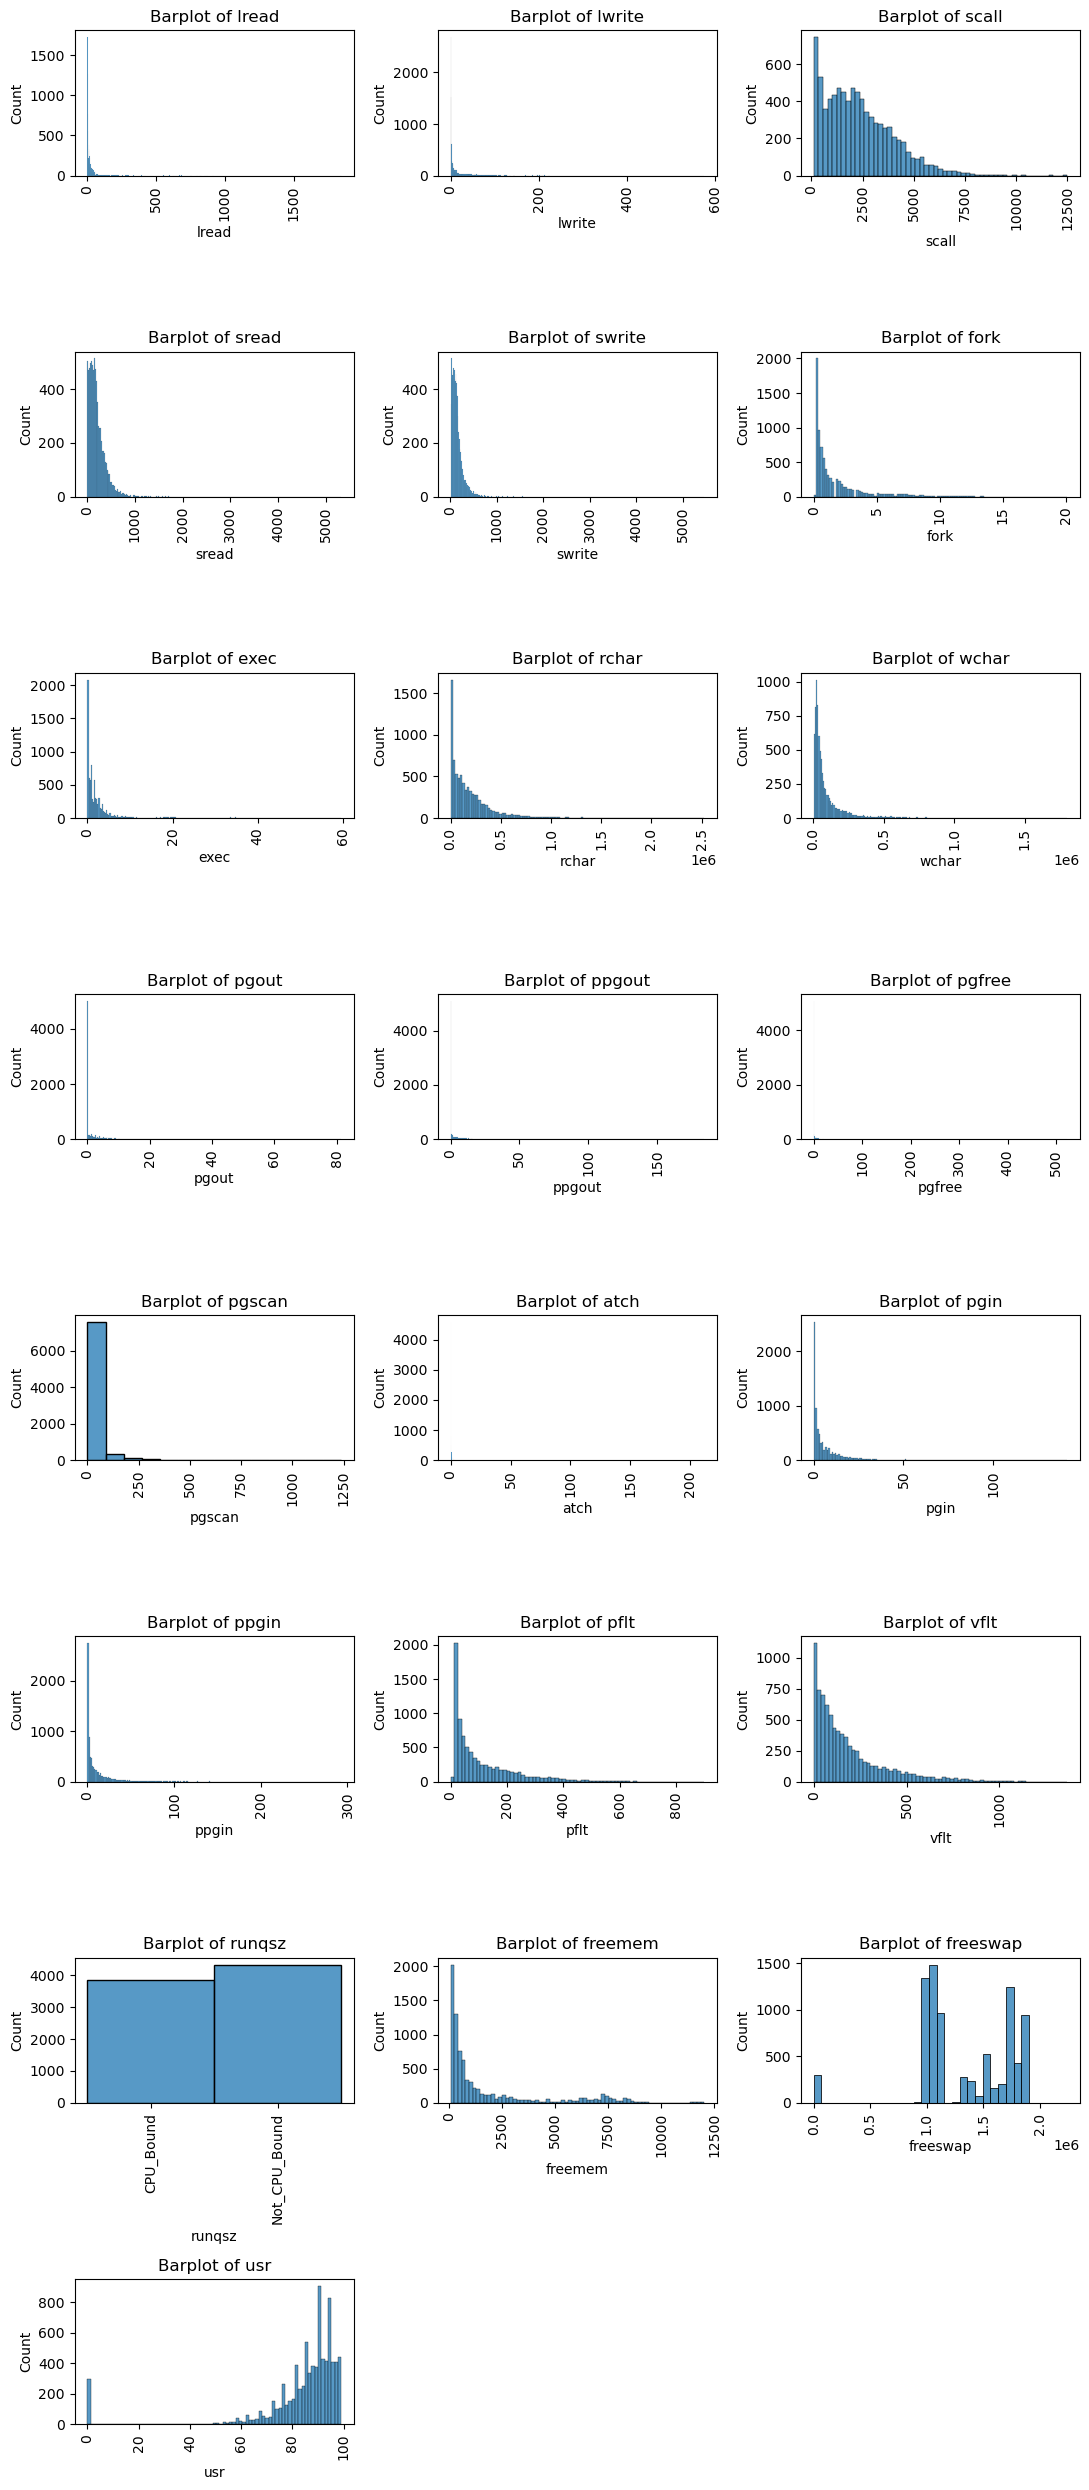

In [4]:
plt.figure(figsize = (11,25))
feature_list = df.columns
for i in range(len(feature_list)):
    plt.subplot(8, 3, i + 1)
    sns.histplot(x = df[feature_list[i]], data = df)
    plt.xticks(rotation=90)
    plt.title('Barplot of {}'.format(feature_list[i]))
    plt.tight_layout()

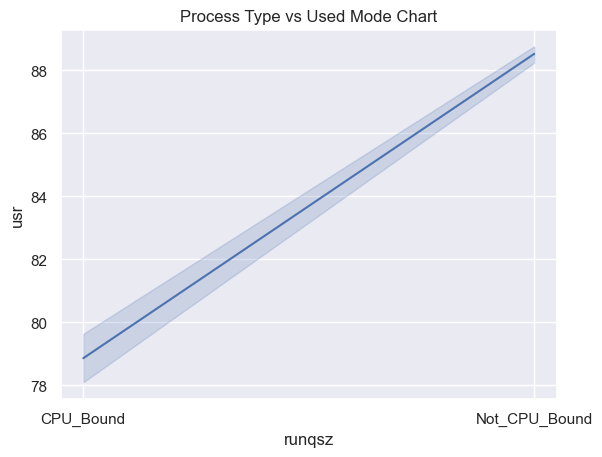

In [33]:
plt.title('Process Type vs Used Mode Chart')
sns.lineplot(data=df, x="runqsz", y="usr");

In [35]:
df.groupby(['usr'])['runqsz'].count()

usr
0     283
1      10
2       1
46      1
48      1
49      1
50      4
51      4
52      2
53      5
54      7
55     10
56     11
57     14
58     17
59     23
60     20
61     16
62     27
63     32
64     27
65     25
66     36
67     39
68     46
69     51
70     42
71     49
72     77
73     73
74     96
75    104
76    119
77    144
78    126
79    150
80    166
81    201
82    187
83    230
84    252
85    254
86    283
87    338
88    384
89    376
90    459
91    448
92    426
93    411
94    421
95    405
96    410
97    410
98    378
99     60
Name: runqsz, dtype: int64

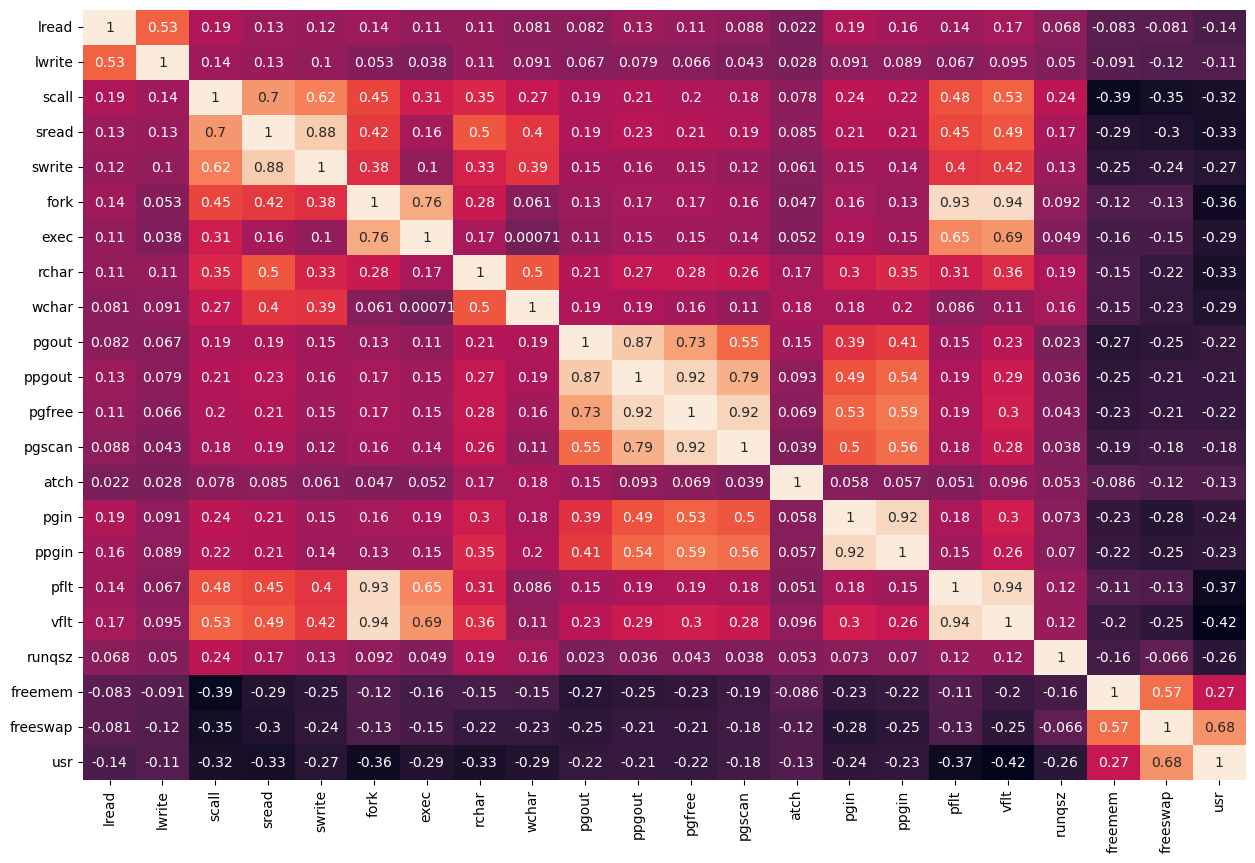

In [34]:
# check corelation among variables
plt.figure(figsize  = (15,10))
sns.heatmap(df.corr(), annot = True, cbar=False)
plt.show()

#### Observations
- All the numerical columns have numerical values alone. 
- 75% of pgscan data are 0, it doesnt make value to the y variable usr. Therefore pgscan variable can be removed from the dataset.
- runqsz has 2 unique values,"Not_CPU_Bound"has more count than CPU_Bound.
- usr values are spread from 55% to 98% in which it runs most at 90%. This shows systems runs more time in user mode.

#### Observations
- Above heat map brings out the correlation between the features.
- There is a high correlation (94%) between vflt and fork; vflt and pflt.
- 93% correlation shown between pflt and fork.
- 92% correlation shown between ppgin and pgin.
- 92% correlation shown between pgfree and ppgout.
- 88% correlation shown between swrite and sread.
- 87% correlation shown between ppgout and pgout

### Problem 1 - Data Pre-processing

In [29]:
# checking for null values
df.isnull().sum()[df.isnull().sum()>0]

rchar    104
wchar     15
dtype: int64

In [6]:
median=df["rchar"].median()
df["rchar"].replace(np.nan,median,inplace=True)

In [7]:
median=df["wchar"].median()
df["wchar"].replace(np.nan,median,inplace=True)

In [33]:
df.isnull().sum()[df.isnull().sum()>0]

Series([], dtype: int64)

In [24]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8192 entries, 0 to 8191
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   lread     8192 non-null   int64  
 1   lwrite    8192 non-null   int64  
 2   scall     8192 non-null   int64  
 3   sread     8192 non-null   int64  
 4   swrite    8192 non-null   int64  
 5   fork      8192 non-null   float64
 6   exec      8192 non-null   float64
 7   rchar     8192 non-null   float64
 8   wchar     8192 non-null   float64
 9   pgout     8192 non-null   float64
 10  ppgout    8192 non-null   float64
 11  pgfree    8192 non-null   float64
 12  pgscan    8192 non-null   float64
 13  atch      8192 non-null   float64
 14  pgin      8192 non-null   float64
 15  ppgin     8192 non-null   float64
 16  pflt      8192 non-null   float64
 17  vflt      8192 non-null   float64
 18  freemem   8192 non-null   int64  
 19  freeswap  8192 non-null   int64  
 20  usr       8192 non-null   int6

In [99]:
# checking for duplicates
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
#df[dups]

Number of duplicate rows = 0


In [8]:
# Count number of zeros in all columns of Dataframe
for col in df.columns:
    column = df[col]
    # Get the count of Zeros in column 
    count = (((column == 0).sum())/(column).count())*100
    print(col, '      : ', count.round(2),'%')

lread       :  8.24 %
lwrite       :  32.76 %
scall       :  0.0 %
sread       :  0.0 %
swrite       :  0.0 %
fork       :  0.26 %
exec       :  0.26 %
rchar       :  0.0 %
wchar       :  0.0 %
pgout       :  59.55 %
ppgout       :  59.55 %
pgfree       :  59.44 %
pgscan       :  78.71 %
atch       :  55.85 %
pgin       :  14.89 %
ppgin       :  14.89 %
pflt       :  0.04 %
vflt       :  0.0 %
runqsz       :  0.0 %
freemem       :  0.0 %
freeswap       :  0.0 %
usr       :  3.45 %


In [8]:
df.runqsz.replace(['CPU_Bound','Not_CPU_Bound'],[1,0],inplace=True )
df.head()

lread  lwrite  scall  sread  swrite  fork  exec     rchar    wchar  pgout  \
0      1       0   2147     79      68   0.2   0.2   40671.0  53995.0    0.0   
1      0       0    170     18      21   0.2   0.2     448.0   8385.0    0.0   
2     15       3   2162    159     119   2.0   2.4  125473.5  31950.0    0.0   
3      0       0    160     12      16   0.2   0.2  125473.5   8670.0    0.0   
4      5       1    330     39      38   0.4   0.4  125473.5  12185.0    0.0   

   ...  pgscan  atch  pgin  ppgin    pflt    vflt  runqsz  freemem  freeswap  \
0  ...     0.0   0.0   1.6    2.6   16.00   26.40       1     4670   1730946   
1  ...     0.0   0.0   0.0    0.0   15.63   16.83       0     7278   1869002   
2  ...     0.0   1.2   6.0    9.4  150.20  220.20       0      702   1021237   
3  ...     0.0   0.0   0.2    0.2   15.60   16.80       0     7248   1863704   
4  ...     0.0   0.0   1.0    1.2   37.80   47.60       0      633   1760253   

   usr  
0   95  
1   97  
2   87  
3   98  
4   90  

[5 rows x 22 columns]

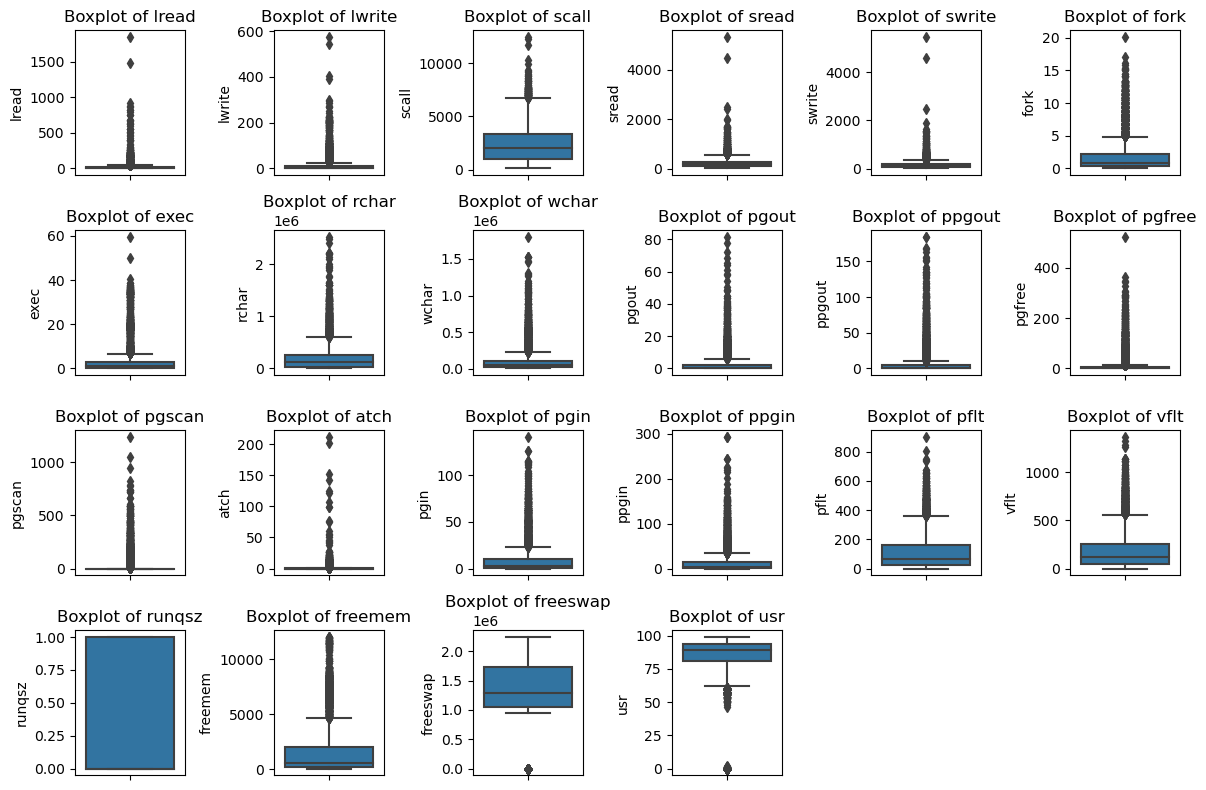

In [9]:
#Check for presence of outliers in each feature
plt.figure(figsize = (12,8))
feature_list = df.columns
for i in range(len(feature_list)):
    plt.subplot(4, 6, i + 1)
    sns.boxplot(y = df[feature_list[i]], data = df)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

In [10]:
expr='usr ~ lread + lwrite + scall + sread + swrite + fork + exec + rchar + wchar + pgout + ppgout + pgfree + pgscan + atch + pgin + ppgin + pflt + vflt + runqsz + freemem + freeswap'

In [11]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= expr, data = df).fit()
lm1.params
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.640
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     692.0
Date:                Fri, 14 Jun 2024   Prob (F-statistic):               0.00
Time:                        06:16:13   Log-Likelihood:                -31296.
No. Observations:                8192   AIC:                         6.264e+04
Df Residuals:                    8170   BIC:                         6.279e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     50.7881      0.587     86.472      0.0

In [12]:
#Define a function which returns the Upper and Lower limit to detect outliers for each feature
def remove_outlier(col):
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range 

In [13]:
#Cap & floor the values beyond the outlier boundaries
for i in feature_list:
    LL, UL = remove_outlier(df[i])
    df[i] = np.where(df[i] > UL, UL, df[i])
    df[i] = np.where(df[i] < LL, LL, df[i])

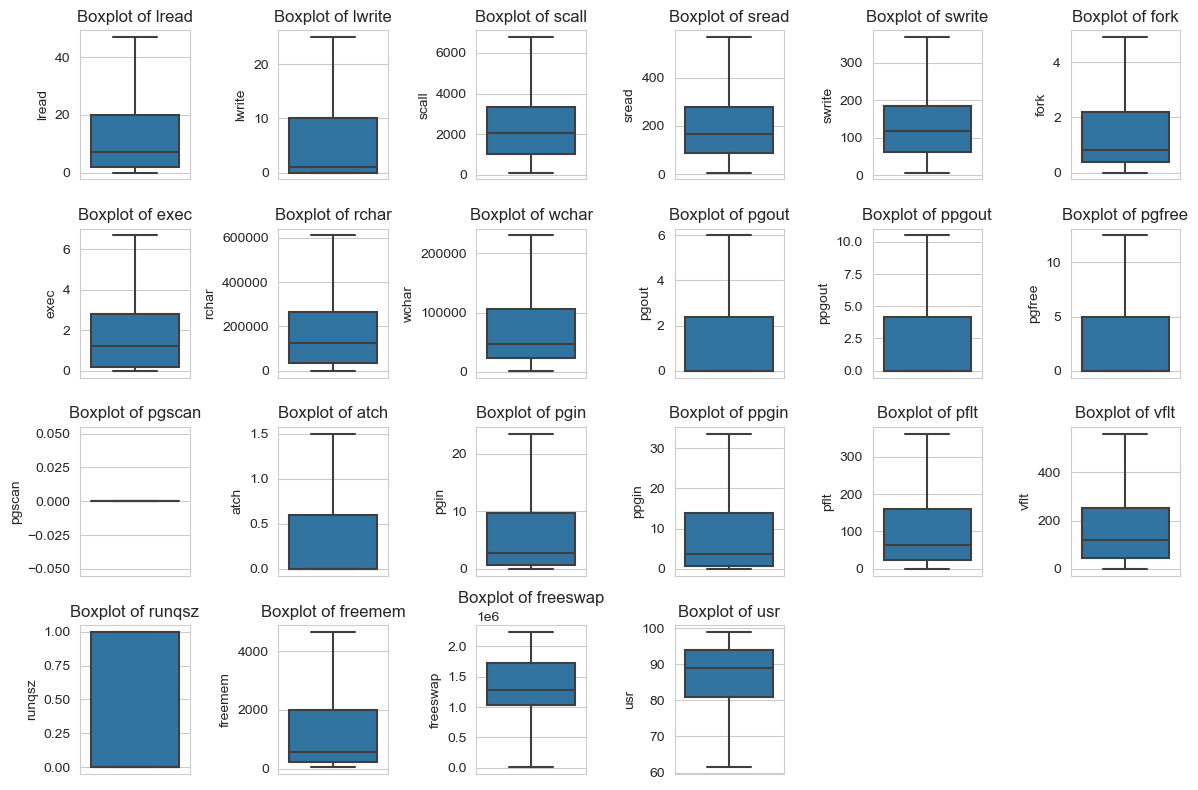

In [134]:
#Check for presence of outliers in each feature
plt.figure(figsize = (12,8))
feature_list = df.columns
for i in range(len(feature_list)):
    plt.subplot(4, 6, i + 1)
    sns.boxplot(y = df[feature_list[i]], data = df)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

#### Encoding the Data

In [137]:
df1=pd.read_excel(r"C:\Users\admin\Desktop\Aaryani\Data Science\Great Learning\6. 5th Month\Project\compactiv.xlsx")
for column in df1.columns:
    if df1[column].dtype == 'object':
        print(column.upper(),': ',df1[column].nunique())
        print(df1[column].value_counts().sort_values())

RUNQSZ :  2
runqsz
CPU_Bound        3861
Not_CPU_Bound    4331
Name: count, dtype: int64


#### Train - Test Split

In [14]:
# Copy all the predictor variables into X dataframe
X = df.drop('usr', axis=1)

# Copy target into the y dataframe. 
y = df[['usr']]

In [139]:
X.head()

lread  lwrite   scall  sread  swrite  fork  exec     rchar    wchar  pgout  \
0    1.0     0.0  2147.0   79.0    68.0   0.2   0.2   40671.0  53995.0    0.0   
1    0.0     0.0   170.0   18.0    21.0   0.2   0.2     448.0   8385.0    0.0   
2   15.0     3.0  2162.0  159.0   119.0   2.0   2.4  125473.5  31950.0    0.0   
3    0.0     0.0   160.0   12.0    16.0   0.2   0.2  125473.5   8670.0    0.0   
4    5.0     1.0   330.0   39.0    38.0   0.4   0.4  125473.5  12185.0    0.0   

   ...  pgfree  pgscan  atch  pgin  ppgin    pflt    vflt  runqsz   freemem  \
0  ...     0.0     0.0   0.0   1.6    2.6   16.00   26.40     1.0  4659.125   
1  ...     0.0     0.0   0.0   0.0    0.0   15.63   16.83     0.0  4659.125   
2  ...     0.0     0.0   1.2   6.0    9.4  150.20  220.20     0.0   702.000   
3  ...     0.0     0.0   0.0   0.2    0.2   15.60   16.80     0.0  4659.125   
4  ...     0.0     0.0   0.0   1.0    1.2   37.80   47.60     0.0   633.000   

    freeswap  
0  1730946.0  
1  1869002.0  
2  1021237.0  
3  1863704.0  
4  1760253.0  

[5 rows x 21 columns]

In [15]:
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=42)

In [101]:
X_train.shape

(5734, 21)

In [102]:
X_train.head()

lread  lwrite   scall  sread  swrite  fork  exec     rchar       wchar  \
1310   26.0    25.0  5731.0  312.0   224.0   0.8  0.80  155004.0  230625.875   
7365   15.0     3.0  1203.0   61.0    34.0   1.6  1.80  163076.0   33674.000   
2284   39.0    16.0  5213.0  568.5   368.0   4.9  4.99  435848.0  230625.875   
7076    2.0     0.0  2585.0  203.0   145.0   0.6  0.60  329604.0  126738.000   
3114    2.0     1.0  1827.0   65.0    88.0   0.4  0.20    4487.0    8828.000   

      pgout  ...  pgfree  pgscan  atch     pgin  ppgin   pflt    vflt  runqsz  \
1310    0.0  ...    0.00     0.0   1.5   0.2000   0.20   48.8  134.00     1.0   
7365    0.0  ...    0.00     0.0   0.0   0.0000   0.00  127.8  199.40     1.0   
2284    6.0  ...   10.18     0.0   1.5  15.7700  17.56  348.1  561.40     1.0   
7076    1.0  ...    1.00     0.0   0.8  23.5125  30.46   49.9  194.39     0.0   
3114    0.0  ...    0.00     0.0   0.0   0.2000   0.20   17.4   17.00     0.0   

      freemem   freeswap  
1310    249.0  1383946.0  
7365   2744.0  1542915.0  
2284    236.0  1002172.0  
7076    451.0  1057294.0  
3114    689.0  1752789.0  

[5 rows x 21 columns]

In [103]:
X_test.shape

(2458, 21)

In [104]:
X_test.head()

lread  lwrite   scall  sread  swrite  fork  exec       rchar  \
5670   14.0     7.0  1495.0  197.0   169.0   0.8   1.0   10304.000   
5369   10.0     8.0  3158.0  324.0   172.0   0.6   2.2  611196.125   
2111    2.0     0.0   813.0  117.0   113.0   1.8   0.6   59903.000   
6659   47.0    25.0  3283.0  134.0   125.0   0.4   0.4   33832.000   
5227   12.0     2.0  2357.0  113.0    96.0   4.9   6.7   55137.000   

           wchar  pgout  ...  pgfree  pgscan  atch     pgin  ppgin    pflt  \
5670   24435.000    6.0  ...    12.5     0.0   1.0   2.0000   2.00   63.07   
5369  230625.875    0.0  ...     0.0     0.0   0.0  23.5125  33.60   46.00   
2111   24550.000    0.6  ...     7.2     0.0   0.0   0.0000   0.00   96.00   
6659   23626.000    4.2  ...     9.0     0.0   0.6   1.8000   2.20   36.40   
5227   36291.000    0.0  ...     0.0     0.0   0.0   8.3800  12.18  231.14   

        vflt  runqsz  freemem   freeswap  
5670  106.79     1.0    186.0   974392.0  
5369   79.20     1.0    510.0  1032922.0  
2111  135.60     0.0    179.0  1761718.0  
6659   56.20     0.0    461.0  1129531.0  
5227  423.35     0.0    530.0  1077027.0  

[5 rows x 21 columns]

### Problem 1- Model Building - Linear regression

In [16]:
# concatenate X and y into a single dataframe
data_train = pd.concat([X_train, y_train], axis=1)
data_test=pd.concat([X_test,y_test],axis=1)
data_train.head()

lread  lwrite   scall  sread  swrite  fork  exec     rchar       wchar  \
1310   26.0    25.0  5731.0  312.0   224.0   0.8  0.80  155004.0  230625.875   
7365   15.0     3.0  1203.0   61.0    34.0   1.6  1.80  163076.0   33674.000   
2284   39.0    16.0  5213.0  568.5   368.0   4.9  4.99  435848.0  230625.875   
7076    2.0     0.0  2585.0  203.0   145.0   0.6  0.60  329604.0  126738.000   
3114    2.0     1.0  1827.0   65.0    88.0   0.4  0.20    4487.0    8828.000   

      pgout  ...  pgscan  atch     pgin  ppgin   pflt    vflt  runqsz  \
1310    0.0  ...     0.0   1.5   0.2000   0.20   48.8  134.00     1.0   
7365    0.0  ...     0.0   0.0   0.0000   0.00  127.8  199.40     1.0   
2284    6.0  ...     0.0   1.5  15.7700  17.56  348.1  561.40     1.0   
7076    1.0  ...     0.0   0.8  23.5125  30.46   49.9  194.39     0.0   
3114    0.0  ...     0.0   0.0   0.2000   0.20   17.4   17.00     0.0   

      freemem   freeswap   usr  
1310    249.0  1383946.0  81.0  
7365   2744.0  1542915.0  93.0  
2284    236.0  1002172.0  64.0  
7076    451.0  1057294.0  86.0  
3114    689.0  1752789.0  94.0  

[5 rows x 22 columns]

In [127]:
data_train.columns

Index(['lread', 'lwrite', 'scall', 'sread', 'swrite', 'fork', 'exec', 'rchar',
       'wchar', 'pgout', 'ppgout', 'pgfree', 'pgscan', 'atch', 'pgin', 'ppgin',
       'pflt', 'vflt', 'runqsz', 'freemem', 'freeswap', 'usr'],
      dtype='object')

In [17]:
expr='usr ~ lread + lwrite + scall + sread + swrite + fork + exec + rchar + wchar + pgout + ppgout + pgfree + pgscan + atch + pgin + ppgin + pflt + vflt + runqsz + freemem + freeswap'

In [18]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= expr, data = data_train).fit()
lm1.params
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     1093.
Date:                Fri, 14 Jun 2024   Prob (F-statistic):               0.00
Time:                        06:16:50   Log-Likelihood:                -16686.
No. Observations:                5734   AIC:                         3.341e+04
Df Residuals:                    5713   BIC:                         3.355e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     85.0494      0.298    285.844      0.0

### Model 

In [19]:
import statsmodels.api as sm

In [36]:
X_train=sm.add_constant(X_train)
X_test=sm.add_constant(X_test)
X_train.columns

Index(['const', 'lread', 'lwrite', 'scall', 'sread', 'swrite', 'fork', 'exec',
       'rchar', 'wchar', 'pgout', 'ppgout', 'pgfree', 'pgscan', 'atch', 'pgin',
       'ppgin', 'pflt', 'vflt', 'runqsz', 'freemem', 'freeswap'],
      dtype='object')

In [37]:
model = sm.OLS(y_train,X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     1093.
Date:                Fri, 14 Jun 2024   Prob (F-statistic):               0.00
Time:                        06:19:19   Log-Likelihood:                -16686.
No. Observations:                5734   AIC:                         3.341e+04
Df Residuals:                    5713   BIC:                         3.355e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         85.0494      0.298    285.844      0.0

In [38]:
# let's check the VIF of the predictors
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series1 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series1))

VIF values: 

const       25.629887
lread        5.222496
lwrite       4.230336
scall        2.987824
sread        6.555928
swrite       5.666273
fork        13.195160
exec         3.216047
rchar        2.088006
wchar        1.583353
pgout       11.215199
ppgout      30.947431
pgfree      17.468614
pgscan            NaN
atch         1.848297
pgin        14.475734
ppgin       14.673035
pflt        11.703237
vflt        15.370510
runqsz       1.151214
freemem      1.974160
freeswap     1.847552
dtype: float64



#### Model 1, Dropping pgscan from training data

In [39]:
X_train1=X_train.drop('pgscan',axis=1)
model1 = sm.OLS(y_train,X_train1).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     1093.
Date:                Fri, 14 Jun 2024   Prob (F-statistic):               0.00
Time:                        06:19:25   Log-Likelihood:                -16686.
No. Observations:                5734   AIC:                         3.341e+04
Df Residuals:                    5713   BIC:                         3.355e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         85.0494      0.298    285.844      0.0

In [40]:
# let's check the VIF of the predictors

vif_series1 = pd.Series(
    [variance_inflation_factor(X_train1.values, i) for i in range(X_train1.shape[1])],
    index=X_train1.columns,
)
print("VIF values: \n\n{}\n".format(vif_series1))

VIF values: 

const       25.629887
lread        5.222496
lwrite       4.230336
scall        2.987824
sread        6.555928
swrite       5.666273
fork        13.195160
exec         3.216047
rchar        2.088006
wchar        1.583353
pgout       11.215199
ppgout      30.947431
pgfree      17.468614
atch         1.848297
pgin        14.475734
ppgin       14.673035
pflt        11.703237
vflt        15.370510
runqsz       1.151214
freemem      1.974160
freeswap     1.847552
dtype: float64



#### Model 2, Dropping ppgout

In [41]:
X_train2=X_train1.drop('ppgout',axis=1)
model3 = sm.OLS(y_train,X_train2).fit()
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     1150.
Date:                Fri, 14 Jun 2024   Prob (F-statistic):               0.00
Time:                        06:19:35   Log-Likelihood:                -16687.
No. Observations:                5734   AIC:                         3.341e+04
Df Residuals:                    5714   BIC:                         3.355e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         85.0682      0.297    286.732      0.0

In [42]:
# let's check the VIF of the predictors

vif_series1 = pd.Series(
    [variance_inflation_factor(X_train2.values, i) for i in range(X_train2.shape[1])],
    index=X_train2.columns,
)
print("VIF values: \n\n{}\n".format(vif_series1))

VIF values: 

const       25.484056
lread        5.220098
lwrite       4.229441
scall        2.987783
sread        6.555363
swrite       5.666264
fork        13.188017
exec         3.214984
rchar        2.088006
wchar        1.580437
pgout        6.324897
pgfree       6.097389
atch         1.847637
pgin        14.437958
ppgin       14.617568
pflt        11.703237
vflt        15.362860
runqsz       1.151159
freemem      1.972182
freeswap     1.845464
dtype: float64



#### Model 3, Dropping vflt

In [43]:
X_train3=X_train2.drop('vflt',axis=1)
model4 = sm.OLS(y_train,X_train3).fit()
print(model4.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     1209.
Date:                Fri, 14 Jun 2024   Prob (F-statistic):               0.00
Time:                        06:19:39   Log-Likelihood:                -16697.
No. Observations:                5734   AIC:                         3.343e+04
Df Residuals:                    5715   BIC:                         3.356e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         84.8905      0.294    288.331      0.0

In [44]:
# let's check the VIF of the predictors

vif_series1 = pd.Series(
    [variance_inflation_factor(X_train3.values, i) for i in range(X_train3.shape[1])],
    index=X_train3.columns,
)
print("VIF values: \n\n{}\n".format(vif_series1))

VIF values: 

const       25.015932
lread        5.205871
lwrite       4.228871
scall        2.980076
sread        6.522749
swrite       5.666264
fork        10.179144
exec         3.211543
rchar        2.078935
wchar        1.556794
pgout        6.320770
pgfree       6.082782
atch         1.835389
pgin        14.314542
ppgin       14.609198
pflt         9.138481
runqsz       1.151126
freemem      1.971164
freeswap     1.787778
dtype: float64



#### Model 4, Dropping for ppgin

In [45]:
X_train4=X_train3.drop('ppgin',axis=1)
model5 = sm.OLS(y_train,X_train4).fit()
print(model5.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     1275.
Date:                Fri, 14 Jun 2024   Prob (F-statistic):               0.00
Time:                        06:19:54   Log-Likelihood:                -16706.
No. Observations:                5734   AIC:                         3.345e+04
Df Residuals:                    5716   BIC:                         3.357e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         84.9371      0.295    288.233      0.0

In [46]:
# let's check the VIF of the predictors

vif_series1 = pd.Series(
    [variance_inflation_factor(X_train4.values, i) for i in range(X_train4.shape[1])],
    index=X_train4.columns,
)
print("VIF values: \n\n{}\n".format(vif_series1))

VIF values: 

const       24.982536
lread        5.174500
lwrite       4.214246
scall        2.979324
sread        6.520655
swrite       5.664162
fork        10.157811
exec         3.211443
rchar        2.047790
wchar        1.556597
pgout        6.317977
pgfree       6.023389
atch         1.832147
pgin         1.551059
pflt         9.136863
runqsz       1.150472
freemem      1.970665
freeswap     1.785747
dtype: float64



#### Model 5, Dropping for fork

In [47]:
X_train5=X_train4.drop('fork',axis=1)
model6 = sm.OLS(y_train,X_train5).fit()
print(model6.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     1353.
Date:                Fri, 14 Jun 2024   Prob (F-statistic):               0.00
Time:                        06:20:01   Log-Likelihood:                -16710.
No. Observations:                5734   AIC:                         3.345e+04
Df Residuals:                    5717   BIC:                         3.357e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         84.9933      0.294    288.837      0.0

In [48]:
# let's check the VIF of the predictors

vif_series1 = pd.Series(
    [variance_inflation_factor(X_train5.values, i) for i in range(X_train5.shape[1])],
    index=X_train5.columns,
)
print("VIF values: \n\n{}\n".format(vif_series1))

VIF values: 

const       24.877736
lread        5.157474
lwrite       4.192981
scall        2.927790
sread        6.519001
swrite       5.407386
exec         2.826431
rchar        2.046398
wchar        1.544227
pgout        6.314333
pgfree       6.022580
atch         1.832111
pgin         1.550357
pflt         3.437042
runqsz       1.150168
freemem      1.969251
freeswap     1.784411
dtype: float64



#### Model 6, Dropping for sread

In [49]:
X_train6=X_train5.drop('sread',axis=1)
model7 = sm.OLS(y_train,X_train6).fit()
print(model7.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     1441.
Date:                Fri, 14 Jun 2024   Prob (F-statistic):               0.00
Time:                        06:20:19   Log-Likelihood:                -16713.
No. Observations:                5734   AIC:                         3.346e+04
Df Residuals:                    5718   BIC:                         3.356e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         85.0342      0.294    289.390      0.0

In [50]:
# let's check the VIF of the predictors

vif_series1 = pd.Series(
    [variance_inflation_factor(X_train6.values, i) for i in range(X_train6.shape[1])],
    index=X_train6.columns,
)
print("VIF values: \n\n{}\n".format(vif_series1))

VIF values: 

const       24.787889
lread        5.142526
lwrite       4.179983
scall        2.649906
swrite       2.942243
exec         2.822449
rchar        1.650933
wchar        1.530482
pgout        6.314258
pgfree       6.019123
atch         1.830291
pgin         1.549922
pflt         3.412717
runqsz       1.149987
freemem      1.968882
freeswap     1.769021
dtype: float64



#### Model 7, Dropping for pgout

In [51]:
X_train7=X_train6.drop('pgout',axis=1)
model8 = sm.OLS(y_train,X_train7).fit()
print(model8.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     1524.
Date:                Fri, 14 Jun 2024   Prob (F-statistic):               0.00
Time:                        06:20:33   Log-Likelihood:                -16744.
No. Observations:                5734   AIC:                         3.352e+04
Df Residuals:                    5719   BIC:                         3.362e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         84.9334      0.295    287.794      0.0

In [52]:
# let's check the VIF of the predictors

vif_series1 = pd.Series(
    [variance_inflation_factor(X_train7.values, i) for i in range(X_train7.shape[1])],
    index=X_train7.columns,
)
print("VIF values: \n\n{}\n".format(vif_series1))

VIF values: 

const       24.740708
lread        5.141000
lwrite       4.178556
scall        2.648313
swrite       2.939561
exec         2.817589
rchar        1.649324
wchar        1.524476
pgfree       1.913050
atch         1.704629
pgin         1.549240
pflt         3.409290
runqsz       1.146688
freemem      1.961778
freeswap     1.768920
dtype: float64



#### Model 8, Dropping for lread

In [53]:
X_train8=X_train7.drop('lread',axis=1)
model10 = sm.OLS(y_train,X_train).fit()
print(model10.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     1093.
Date:                Fri, 14 Jun 2024   Prob (F-statistic):               0.00
Time:                        06:20:42   Log-Likelihood:                -16686.
No. Observations:                5734   AIC:                         3.341e+04
Df Residuals:                    5713   BIC:                         3.355e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         85.0494      0.298    285.844      0.0

In [54]:
# let's check the VIF of the predictors

vif_series1 = pd.Series(
    [variance_inflation_factor(X_train8.values, i) for i in range(X_train8.shape[1])],
    index=X_train8.columns,
)
print("VIF values: \n\n{}\n".format(vif_series1))

VIF values: 

const       24.740576
lwrite       1.049636
scall        2.639040
swrite       2.939196
exec         2.797733
rchar        1.648657
wchar        1.521240
pgfree       1.910778
atch         1.704007
pgin         1.513149
pflt         3.235354
runqsz       1.137152
freemem      1.961187
freeswap     1.764112
dtype: float64



#### Model 9, Dropping for pflt

In [55]:
X_train9=X_train7.drop('pflt',axis=1)
model11 = sm.OLS(y_train,X_train9).fit()
print(model11.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     1224.
Date:                Fri, 14 Jun 2024   Prob (F-statistic):               0.00
Time:                        06:20:56   Log-Likelihood:                -17384.
No. Observations:                5734   AIC:                         3.480e+04
Df Residuals:                    5720   BIC:                         3.489e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         86.1771      0.328    262.804      0.0

In [56]:
# let's check the VIF of the predictors

vif_series1 = pd.Series(
    [variance_inflation_factor(X_train9.values, i) for i in range(X_train9.shape[1])],
    index=X_train9.columns,
)
print("VIF values: \n\n{}\n".format(vif_series1))

VIF values: 

const       24.433796
lread        4.878715
lwrite       4.019578
scall        2.641625
swrite       2.512271
exec         1.531659
rchar        1.601010
wchar        1.473148
pgfree       1.910183
atch         1.703359
pgin         1.540964
runqsz       1.144325
freemem      1.942505
freeswap     1.751250
dtype: float64



#### Model 10, Dropping for lread

In [57]:
X_train10=X_train9.drop('lread',axis=1)
model12 = sm.OLS(y_train,X_train10).fit()
print(model12.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                     1258.
Date:                Fri, 14 Jun 2024   Prob (F-statistic):               0.00
Time:                        06:21:08   Log-Likelihood:                -17496.
No. Observations:                5734   AIC:                         3.502e+04
Df Residuals:                    5721   BIC:                         3.510e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         86.3174      0.334    258.278      0.0

In [58]:
# let's check the VIF of the predictors

vif_series1 = pd.Series(
    [variance_inflation_factor(X_train10.values, i) for i in range(X_train10.shape[1])],
    index=X_train10.columns,
)
print("VIF values: \n\n{}\n".format(vif_series1))

VIF values: 

const       24.414125
lwrite       1.049635
scall        2.635242
swrite       2.482973
exec         1.365535
rchar        1.595008
wchar        1.460844
pgfree       1.906419
atch         1.703058
pgin         1.510715
runqsz       1.136409
freemem      1.942452
freeswap     1.749621
dtype: float64



#### Model 11, Dropping for scall

In [59]:
X_train11=X_train10.drop('scall',axis=1)
model13 = sm.OLS(y_train,X_train11).fit()
print(model13.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     1347.
Date:                Fri, 14 Jun 2024   Prob (F-statistic):               0.00
Time:                        06:21:11   Log-Likelihood:                -17535.
No. Observations:                5734   AIC:                         3.509e+04
Df Residuals:                    5722   BIC:                         3.517e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         85.8855      0.333    258.030      0.0

In [60]:
# let's check the VIF of the predictors

vif_series1 = pd.Series(
    [variance_inflation_factor(X_train11.values, i) for i in range(X_train11.shape[1])],
    index=X_train11.columns,
)
print("VIF values: \n\n{}\n".format(vif_series1))

VIF values: 

const       23.893957
lwrite       1.049249
swrite       1.535341
exec         1.260948
rchar        1.594305
wchar        1.460761
pgfree       1.904803
atch         1.699365
pgin         1.508056
runqsz       1.120953
freemem      1.919942
freeswap     1.747004
dtype: float64



#### Model 12, Dropping for wchar

In [61]:
X_train12=X_train11.drop('wchar',axis=1)
model14 = sm.OLS(y_train,X_train12).fit()
print(model14.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.720
Method:                 Least Squares   F-statistic:                     1478.
Date:                Fri, 14 Jun 2024   Prob (F-statistic):               0.00
Time:                        06:21:15   Log-Likelihood:                -17540.
No. Observations:                5734   AIC:                         3.510e+04
Df Residuals:                    5723   BIC:                         3.518e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         85.9396      0.333    258.346      0.0

In [62]:
# let's check the VIF of the predictors

vif_series1 = pd.Series(
    [variance_inflation_factor(X_train12.values, i) for i in range(X_train12.shape[1])],
    index=X_train12.columns,
)
print("VIF values: \n\n{}\n".format(vif_series1))

VIF values: 

const       23.829179
lwrite       1.043616
swrite       1.434641
exec         1.242325
rchar        1.415311
pgfree       1.902669
atch         1.699188
pgin         1.504967
runqsz       1.096978
freemem      1.917160
freeswap     1.746883
dtype: float64



#### Model 13, Dropping for atch

In [63]:
X_train13=X_train12.drop('atch',axis=1)
model15 = sm.OLS(y_train,X_train13).fit()
print(model15.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.720
Method:                 Least Squares   F-statistic:                     1641.
Date:                Fri, 14 Jun 2024   Prob (F-statistic):               0.00
Time:                        06:21:17   Log-Likelihood:                -17542.
No. Observations:                5734   AIC:                         3.510e+04
Df Residuals:                    5724   BIC:                         3.517e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         86.0328      0.329    261.481      0.0

In [64]:
# let's check the VIF of the predictors

vif_series1 = pd.Series(
    [variance_inflation_factor(X_train13.values, i) for i in range(X_train13.shape[1])],
    index=X_train13.columns,
)
print("VIF values: \n\n{}\n".format(vif_series1))

VIF values: 

const       23.301367
lwrite       1.038741
swrite       1.434583
exec         1.233953
rchar        1.404070
pgfree       1.537329
pgin         1.504717
runqsz       1.095707
freemem      1.873109
freeswap     1.740952
dtype: float64



#### Linearity and Independence of predictors 

In [65]:
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train.values.flatten()  # actual values
df_pred["Fitted Values"] = model15.fittedvalues.values  # predicted values
df_pred["Residuals"] = model15.resid.values  # residuals

df_pred.head()

Actual Values  Fitted Values  Residuals
0           81.0      86.560085  -5.560085
1           93.0      90.534799   2.465201
2           64.0      67.462342  -3.462342
3           86.0      85.458306   0.541694
4           94.0      98.036729  -4.036729

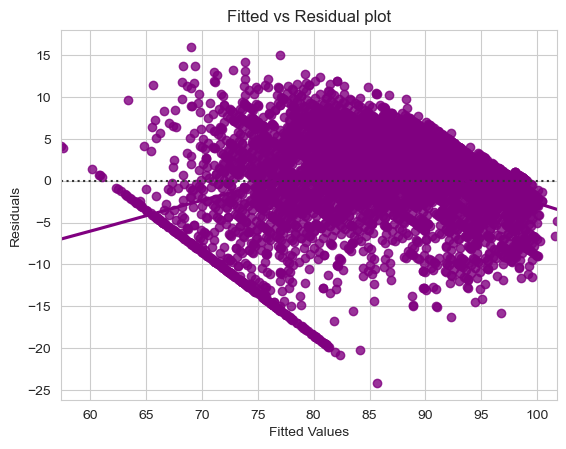

In [66]:
# let us plot the fitted values vs residuals
sns.set_style("whitegrid")
sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

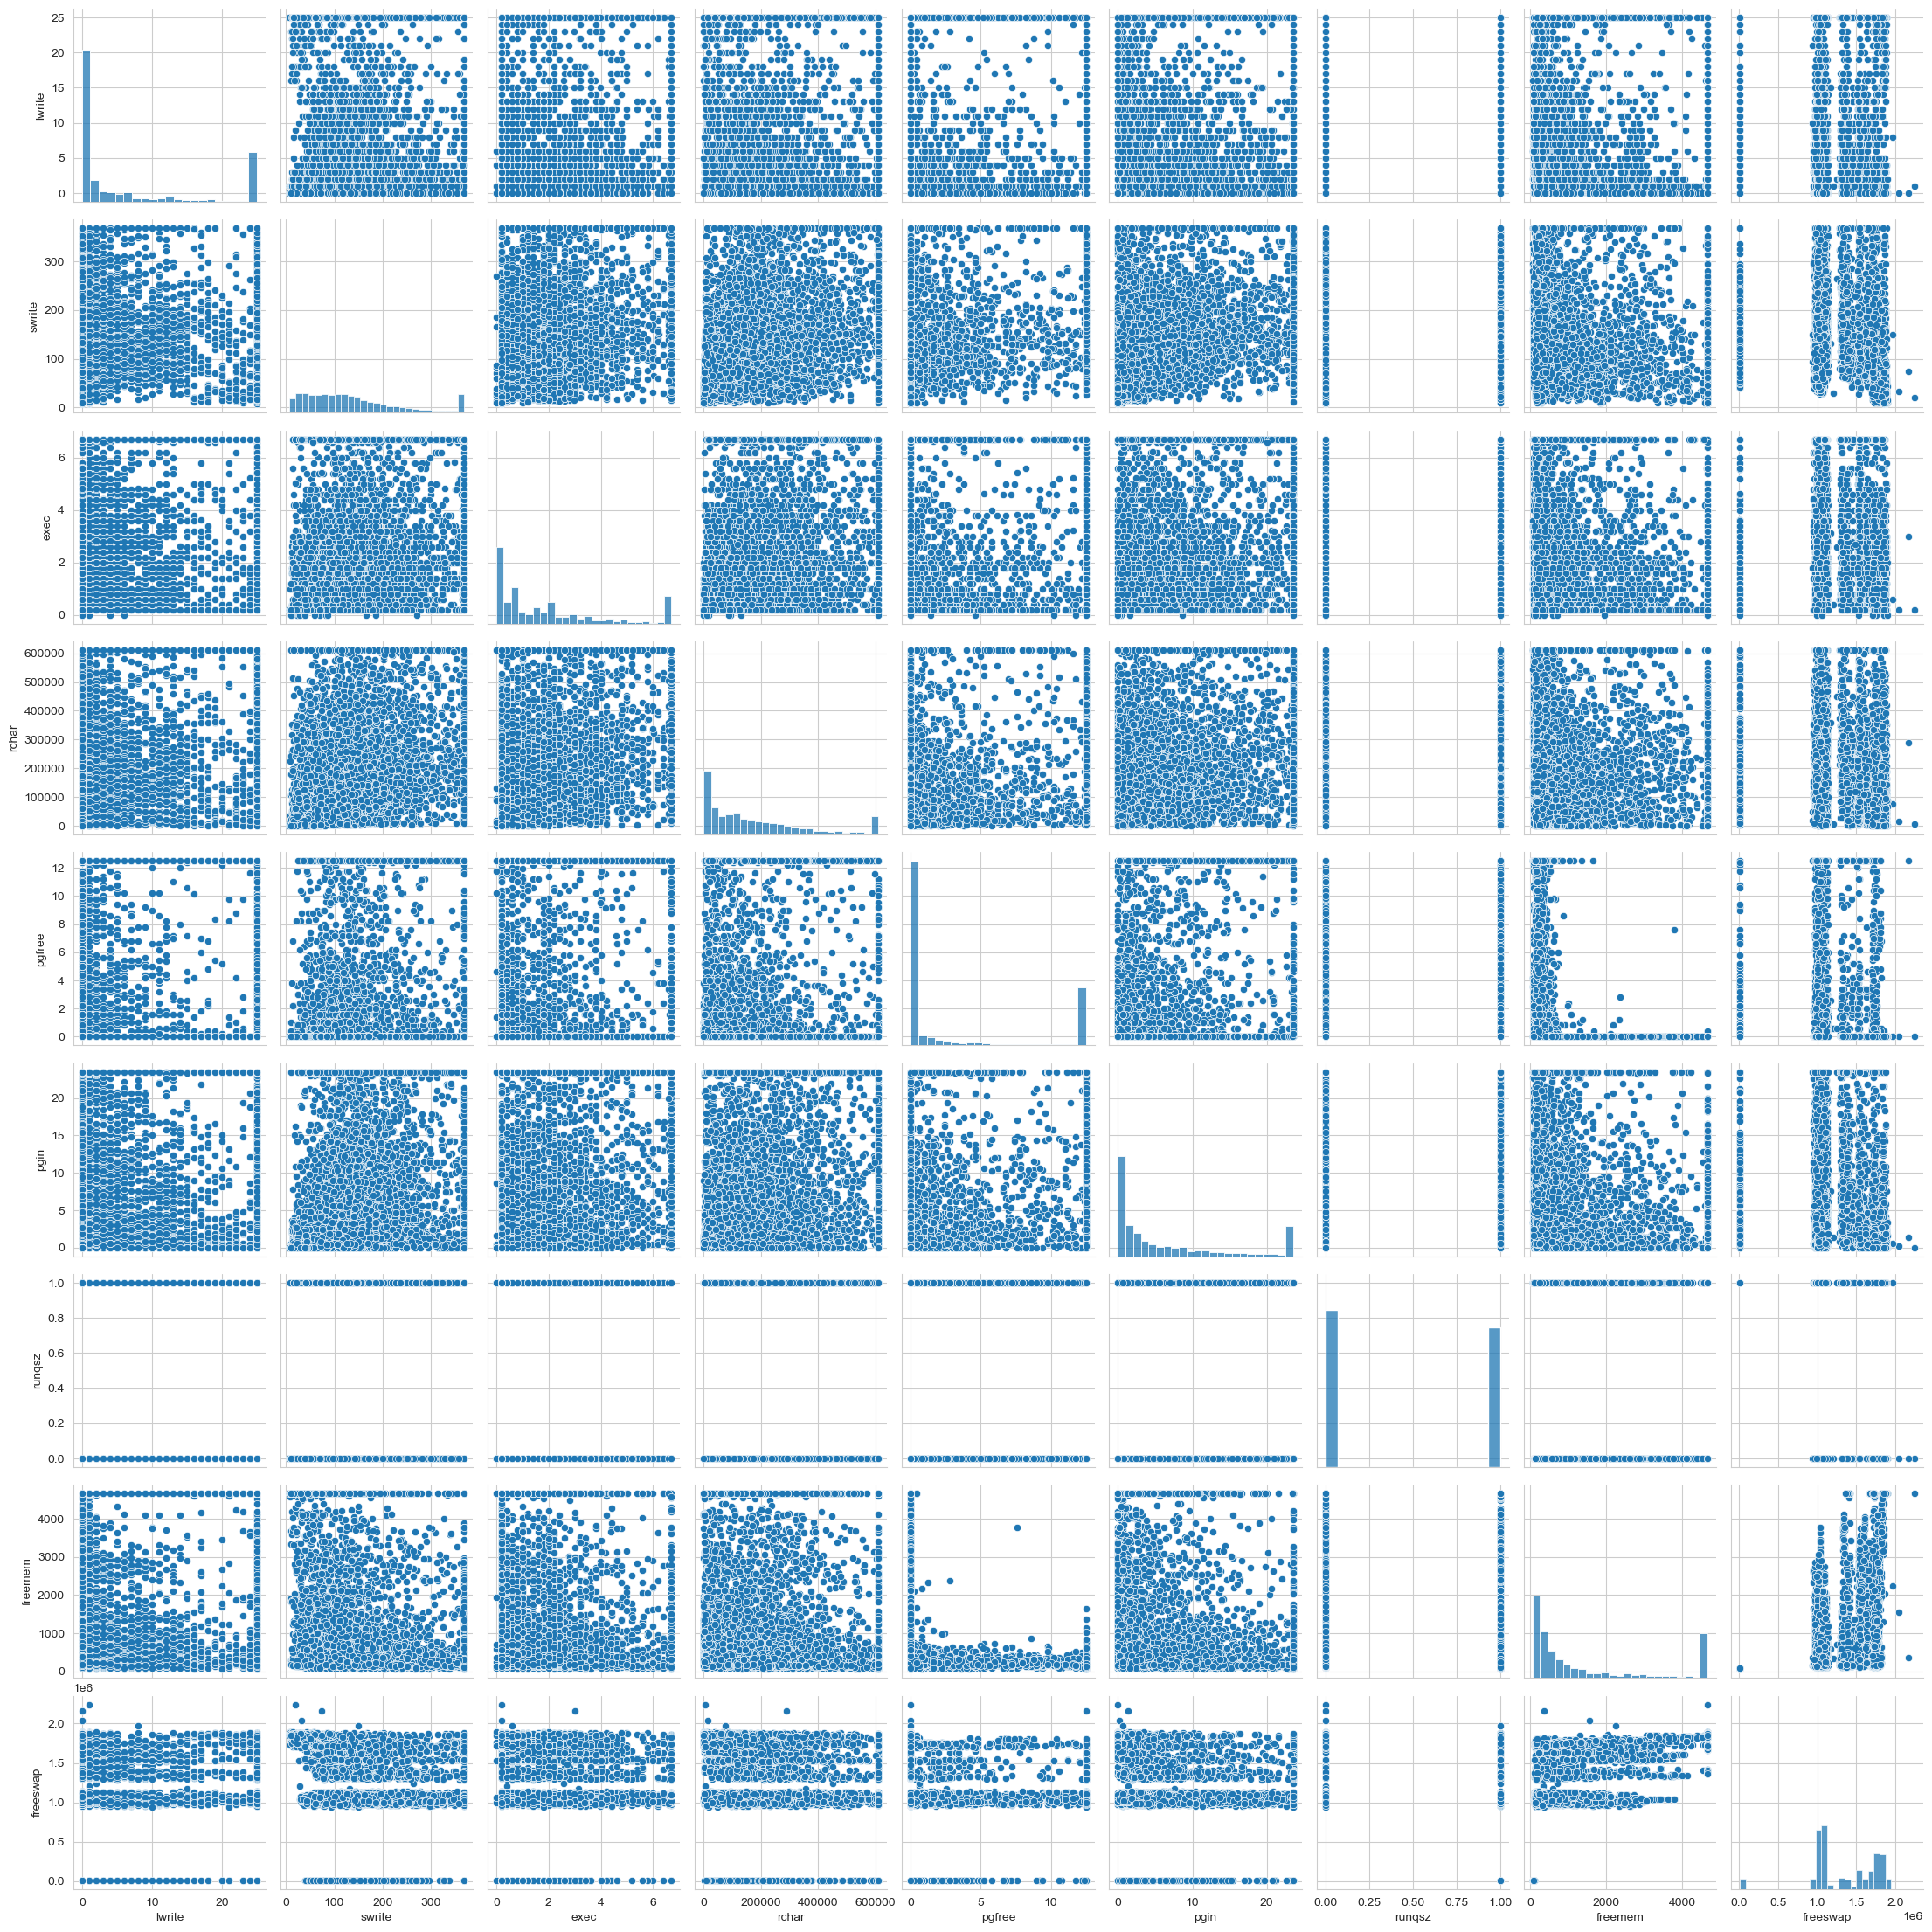

In [67]:
df1=X_train13.drop('const',axis=1)
sns.pairplot(df1)

In [102]:
X_train13['freeswap_sq']=np.square(X_train13['freeswap'])
X_train13['swrite_sq']=np.square(X_train13['swrite'])
X_train14=X_train13.copy()

In [103]:
model16 = sm.OLS(y_train,X_train14).fit()
print(model16.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     2321.
Date:                Fri, 14 Jun 2024   Prob (F-statistic):               0.00
Time:                        06:46:14   Log-Likelihood:                -16331.
No. Observations:                5734   AIC:                         3.269e+04
Df Residuals:                    5722   BIC:                         3.277e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          74.8472      0.365    204.817      

In [104]:
# let's check the VIF of the predictors

vif_series1 = pd.Series(
    [variance_inflation_factor(X_train14.values, i) for i in range(X_train14.shape[1])],
    index=X_train14.columns,
)
print("VIF values: \n\n{}\n".format(vif_series1))

VIF values: 

const           0.000000
lwrite          1.041968
swrite         20.542742
exec            1.251046
rchar           1.411479
pgfree          1.540611
pgin            1.554020
runqsz          1.207760
freemem         2.196544
freeswap       15.507093
freeswap_sq    19.546819
swrite_sq      17.335085
dtype: float64



In [71]:
df_pred1 = pd.DataFrame()

df_pred1["Actual Values"] = y_train.values.flatten()  # actual values
df_pred1["Fitted Values"] = model16.fittedvalues.values  # predicted values
df_pred1["Residuals"] = model16.resid.values  # residuals

df_pred.head()

Actual Values  Fitted Values  Residuals
0           81.0      86.560085  -5.560085
1           93.0      90.534799   2.465201
2           64.0      67.462342  -3.462342
3           86.0      85.458306   0.541694
4           94.0      98.036729  -4.036729

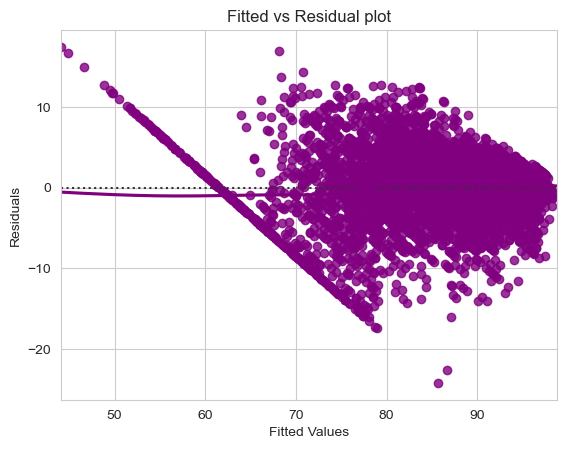

In [72]:
# let us plot the fitted values vs residuals
sns.set_style("whitegrid")
sns.residplot(
    data=df_pred1, x="Fitted Values", y="Residuals", color="purple", lowess=True)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

In [73]:
X_train14.shape

(5734, 12)

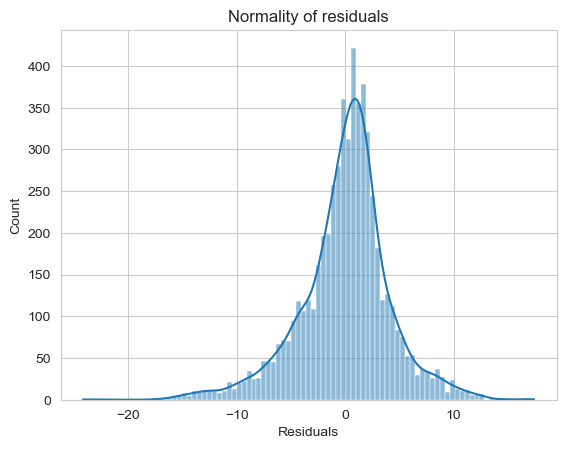

In [77]:
sns.histplot(df_pred1["Residuals"], kde=True)
plt.title("Normality of residuals")
plt.show()

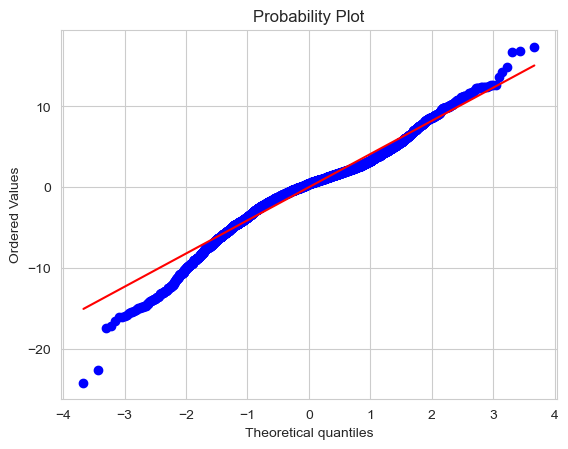

In [78]:
import pylab
import scipy.stats as stats

stats.probplot(df_pred1["Residuals"], dist="norm", plot=pylab)
plt.show()

In [79]:
stats.shapiro(df_pred1["Residuals"])

ShapiroResult(statistic=0.9659520387649536, pvalue=9.229837001750153e-35)

In [80]:
print("statistic=0.9659520387649536\npvalue=9.229837001750153e-35")

statistic=0.9659520387649536
pvalue=9.229837001750153e-35


* Since p-value < 0.05, the residuals are not normal as per shapiro test.
* Strictly speaking - the residuals are not normal. However, as an approximation, we might be willing to accept this distribution as close to being normal

#### TEST FOR HOMOSCEDASTICITY

In [82]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

In [86]:
name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred1["Residuals"], X_train14)
lzip(name, test)

[('F statistic', 1.0110951626451194), ('p-value', 0.3840883958116449)]

#### All the assumptions of linear regression are now satisfied. Let's check the summary of our final model 

In [87]:
print(model16.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     2321.
Date:                Fri, 14 Jun 2024   Prob (F-statistic):               0.00
Time:                        06:28:45   Log-Likelihood:                -16331.
No. Observations:                5734   AIC:                         3.269e+04
Df Residuals:                    5722   BIC:                         3.277e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          74.8472      0.365    204.817      

#### Observations
 - R-squared of the model is 0.890 and adjusted R-squared is 0.817, which shows that the model is able to explain ~81% variance in the data. This is quite good.
 - A unit increase in the freemem will result in a 0.0004 unit increase in the usr, all other variables remaining constant.
 - The usr of a process of CPU_Bound will be -0.4667 units lesser than a process of Not_CPU_Bound, all other variables remaining constant.

### Predictions

In [96]:
# let's check the model parameters
model16.params.round(10)

const          74.847189
lwrite         -0.031144
swrite         -0.029950
exec           -2.017936
rchar          -0.000006
pgfree         -0.073518
pgin           -0.158754
runqsz         -0.466721
freemem         0.000434
freeswap        0.000035
freeswap_sq    -0.000000
swrite_sq      -0.000014
dtype: float64

In [97]:
# Let us write the equation of linear regression
Equation = "usr ="
print(Equation, end=" ")
for i in range(len(X_train14.columns)):
    if i == 0:
        print(model16.params[i], "+", end=" ")
    elif i != len(X_train14.columns) - 1:
        print(
            model16.params[i],
            "* (",
            X_train14.columns[i],
            ")",
            "+",
            end="  ",
        )
    else:
        print(model16.params[i], "* (", X_train14.columns[i], ")")

usr = 74.8471891993446 + -0.031144299605293357 * ( lwrite ) +  -0.029950302359855907 * ( swrite ) +  -2.017935849804573 * ( exec ) +  -6.112959549440973e-06 * ( rchar ) +  -0.073517857785101 * ( pgfree ) +  -0.15875359921697435 * ( pgin ) +  -0.46672076582632216 * ( runqsz ) +  0.00043445364032663585 * ( freemem ) +  3.487109155021237e-05 * ( freeswap ) +  -1.2556835025774306e-11 * ( freeswap_sq ) +  -1.3823165912853517e-05 * ( swrite_sq )


#### We can now use the model for making predictions on the test data.

In [98]:
X_train14.columns

Index(['const', 'lwrite', 'swrite', 'exec', 'rchar', 'pgfree', 'pgin',
       'runqsz', 'freemem', 'freeswap', 'freeswap_sq', 'swrite_sq'],
      dtype='object')

In [99]:
X_test.columns

Index(['const', 'lread', 'lwrite', 'scall', 'sread', 'swrite', 'fork', 'exec',
       'rchar', 'wchar', 'pgout', 'ppgout', 'pgfree', 'pgscan', 'atch', 'pgin',
       'ppgin', 'pflt', 'vflt', 'runqsz', 'freemem', 'freeswap'],
      dtype='object')

In [121]:
# dropping columns from the test data that are not there in the training data
X_test1 = X_test.drop(
    ["lread", "scall", "sread", "fork", "wchar", "pgout", "ppgout", "pgscan", "atch", "ppgin", "pflt", "vflt"], axis=1
)
X_test1.head()

const  lwrite  swrite  exec       rchar  pgfree     pgin  runqsz  \
5670    1.0     7.0   169.0   1.0   10304.000    12.5   2.0000     1.0   
5369    1.0     8.0   172.0   2.2  611196.125     0.0  23.5125     1.0   
2111    1.0     0.0   113.0   0.6   59903.000     7.2   0.0000     0.0   
6659    1.0    25.0   125.0   0.4   33832.000     9.0   1.8000     0.0   
5227    1.0     2.0    96.0   6.7   55137.000     0.0   8.3800     0.0   

      freemem   freeswap  
5670    186.0   974392.0  
5369    510.0  1032922.0  
2111    179.0  1761718.0  
6659    461.0  1129531.0  
5227    530.0  1077027.0

In [122]:
# transforming the weight column in the test data corresponding to the training set
X_test1["freeswap_sq"] = np.square(X_test1["freeswap"])
X_test1["swrite_sq"] = np.square(X_test1["swrite"])
X_test2=X_test1.copy

In [123]:
X_test1.columns

Index(['const', 'lwrite', 'swrite', 'exec', 'rchar', 'pgfree', 'pgin',
       'runqsz', 'freemem', 'freeswap', 'freeswap_sq', 'swrite_sq'],
      dtype='object')

In [124]:
# let's make predictions on the test set
y_pred = model16.predict(X_test1)

In [38]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [131]:
# let's check the RMSE on the train & test data
# Train Data
rmse1 = np.sqrt(mean_squared_error(y_train, df_pred1["Fitted Values"])).round(3)
# Test Data
rmse2 = np.sqrt(mean_squared_error(y_test, y_pred)).round(3)
print("RMSE OF TRAIN DATA = ",rmse1)
print("RMSE OF TEST DATA = ",rmse2)

RMSE OF TRAIN DATA =  4.175
RMSE OF TEST DATA =  4.13


In [132]:
# let's check the MAE on the train & test data
# Train Data
mae1 = mean_absolute_error(y_train, df_pred["Fitted Values"]).round(3)
# Test Data
mae2 = mean_absolute_error(y_test, y_pred).round(3)
print("MAE OF TRAIN DATA = ",mae1)
print("MAE OF TEST DATA = ",mae2)

MAE OF TRAIN DATA =  3.866
MAE OF TEST DATA =  2.978


#### Observations
 - We can see that RMSE on the train and test sets are comparable. So, our model is not suffering from overfitting.
 - MAE indicates that our current model is able to predict usr within a mean error of 2.9 units on the test data.
 - Hence, we can conclude the final model is good for prediction as well as inference purposes. 

#### Through this model, we advise that there is a greater likelihood of an increase in the amount of time CPUs are used in user mode when the aforementioned factors are used sparingly.

### Problem - 2
#### Objective
In your role as a statistician at the Republic of Indonesia Ministry of Health, you have been entrusted with a dataset containing information from a Contraceptive Prevalence Survey. This dataset encompasses data from 1473 married females who were either not pregnant or were uncertain of their pregnancy status during the survey.

Your task involves predicting whether these women opt for a contraceptive method of choice. This prediction will be based on a comprehensive analysis of their demographic and socio-economic attributes.

#### Data Description
- Wife's age (numerical)
- Wife's education (categorical) 1=uneducated, 2, 3, 4=tertiary
- Husband's education (categorical) 1=uneducated, 2, 3, 4=tertiary
- Number of children ever born (numerical)
- Wife's religion (binary) Non-Scientology, Scientology
- Wife's now working? (binary) Yes, No
- Husband's occupation (categorical) 1, 2, 3, 4(random)
- Standard-of-living index (categorical) 1=verlow, 2, 3, 4=high
- Media exposure (binary) Good, Not good
- Contraceptive method used (class attribute) No,Yes

#### Problem 2 - Define the problem and perform exploratory Data Analysis

In [2]:
df=pd.read_excel(r"C:\Users\admin\Desktop\Aaryani\Data Science\Great Learning\6. 5th Month\Project\Contraceptive_method_dataset.xlsx")
df.head()

Wife_age Wife_ education Husband_education  No_of_children_born  \
0      24.0         Primary         Secondary                  3.0   
1      45.0      Uneducated         Secondary                 10.0   
2      43.0         Primary         Secondary                  7.0   
3      42.0       Secondary           Primary                  9.0   
4      36.0       Secondary         Secondary                  8.0   

  Wife_religion Wife_Working  Husband_Occupation Standard_of_living_index  \
0   Scientology           No                   2                     High   
1   Scientology           No                   3                Very High   
2   Scientology           No                   3                Very High   
3   Scientology           No                   3                     High   
4   Scientology           No                   3                      Low   

  Media_exposure  Contraceptive_method_used  
0         Exposed                        No  
1         Exposed                        No  
2         Exposed                        No  
3         Exposed                        No  
4         Exposed                        No

In [8]:
df.shape

(1473, 10)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Wife_age                   1402 non-null   float64
 1   Wife_ education            1473 non-null   object 
 2   Husband_education          1473 non-null   object 
 3   No_of_children_born        1452 non-null   float64
 4   Wife_religion              1473 non-null   object 
 5   Wife_Working               1473 non-null   object 
 6   Husband_Occupation         1473 non-null   int64  
 7   Standard_of_living_index   1473 non-null   object 
 8   Media_exposure             1473 non-null   object 
 9   Contraceptive_method_used  1473 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 115.2+ KB


In [10]:
# checking for duplicates
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
print(df.shape)

Number of duplicate rows = 80
(1473, 10)


In [3]:
df.drop_duplicates(inplace=True)

In [12]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
print(df.shape)

Number of duplicate rows = 0
(1393, 10)


In [13]:
df.describe(include='all').T

count unique          top  freq       mean  \
Wife_age                   1326.0    NaN          NaN   NaN  32.557315   
Wife_ education              1393      4     Tertiary   515        NaN   
Husband_education            1393      4     Tertiary   827        NaN   
No_of_children_born        1372.0    NaN          NaN   NaN   3.290816   
Wife_religion                1393      2  Scientology  1186        NaN   
Wife_Working                 1393      2           No  1043        NaN   
Husband_Occupation         1393.0    NaN          NaN   NaN   2.174444   
Standard_of_living_index     1393      4    Very High   618        NaN   
Media_exposure               1393      2      Exposed  1284        NaN   
Contraceptive_method_used    1393      2          Yes   779        NaN   

                                std   min   25%   50%   75%   max  
Wife_age                   8.289259  16.0  26.0  32.0  39.0  49.0  
Wife_ education                 NaN   NaN   NaN   NaN   NaN   NaN  
Husband_education               NaN   NaN   NaN   NaN   NaN   NaN  
No_of_children_born        2.399697   0.0   1.0   3.0   5.0  16.0  
Wife_religion                   NaN   NaN   NaN   NaN   NaN   NaN  
Wife_Working                    NaN   NaN   NaN   NaN   NaN   NaN  
Husband_Occupation          0.85459   1.0   1.0   2.0   3.0   4.0  
Standard_of_living_index        NaN   NaN   NaN   NaN   NaN   NaN  
Media_exposure                  NaN   NaN   NaN   NaN   NaN   NaN  
Contraceptive_method_used       NaN   NaN   NaN   NaN   NaN   NaN

In [14]:
# geeting unique counts of all the objects
for feature in df.columns: 
    if df[feature].dtype == 'object': 
        print(df[feature].value_counts())
        print('\n')

Wife_ education
Tertiary      515
Secondary     398
Primary       330
Uneducated    150
Name: count, dtype: int64


Husband_education
Tertiary      827
Secondary     347
Primary       175
Uneducated     44
Name: count, dtype: int64


Wife_religion
Scientology        1186
Non-Scientology     207
Name: count, dtype: int64


Wife_Working
No     1043
Yes     350
Name: count, dtype: int64


Standard_of_living_index
Very High    618
High         419
Low          227
Very Low     129
Name: count, dtype: int64


Media_exposure 
Exposed        1284
Not-Exposed     109
Name: count, dtype: int64


Contraceptive_method_used
Yes    779
No     614
Name: count, dtype: int64




#### Univariant, Bivariant & Multivariant Analysis

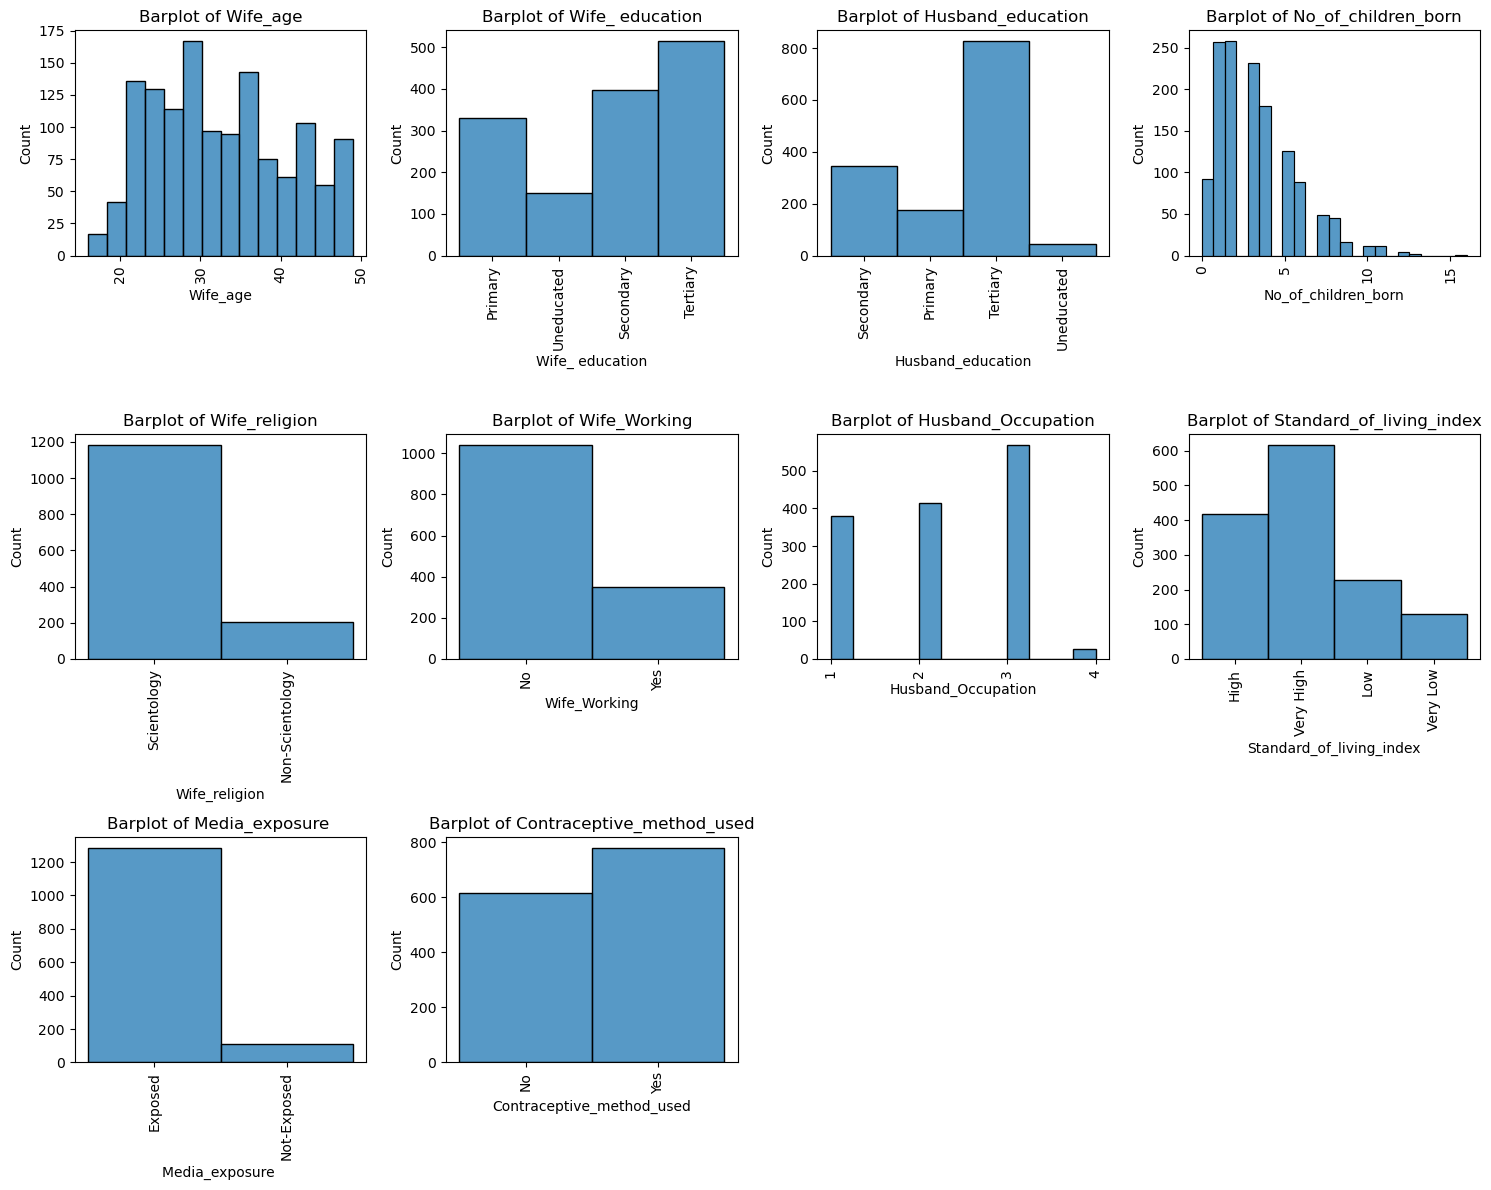

In [15]:
plt.figure(figsize = (15,12))
feature_list = df.columns
for i in range(len(feature_list)):
    plt.subplot(3, 4, i + 1)
    sns.histplot(x = df[feature_list[i]], data = df)
    plt.xticks(rotation=90)
    plt.title('Barplot of {}'.format(feature_list[i]))
    plt.tight_layout()

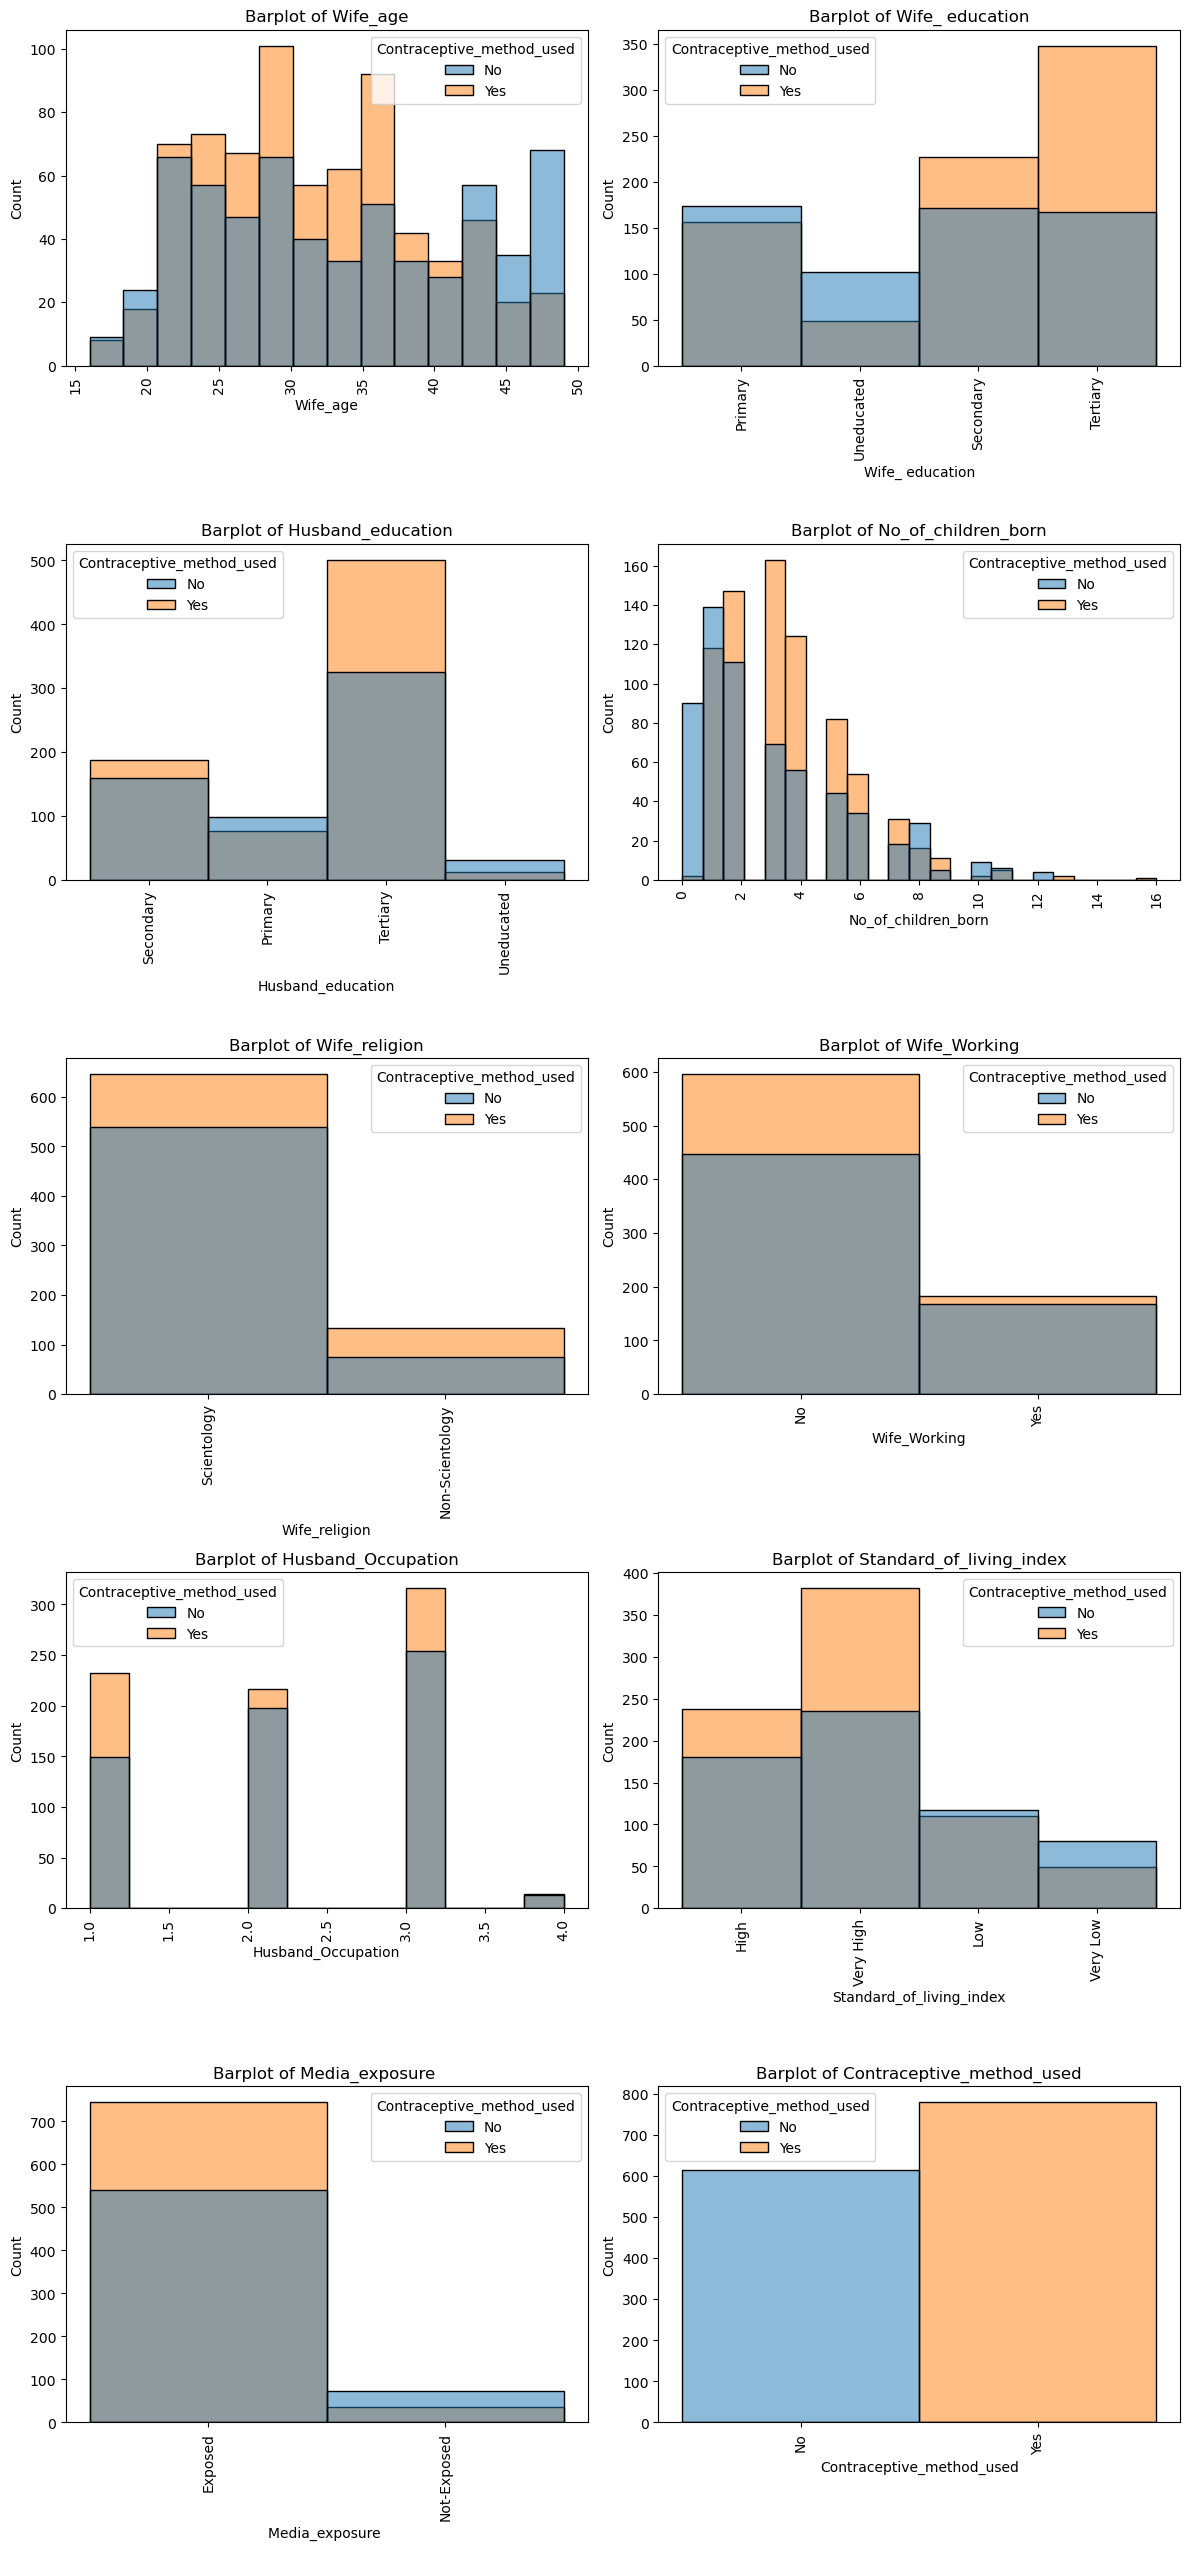

In [16]:
plt.figure(figsize = (12,45))
feature_list = df.columns
for i in range(len(feature_list)):
    plt.subplot(9, 2, i + 1)
    sns.histplot(x = df[feature_list[i]], data = df, hue='Contraceptive_method_used')
    plt.xticks(rotation=90)
    plt.title('Barplot of {}'.format(feature_list[i]))
    plt.tight_layout()

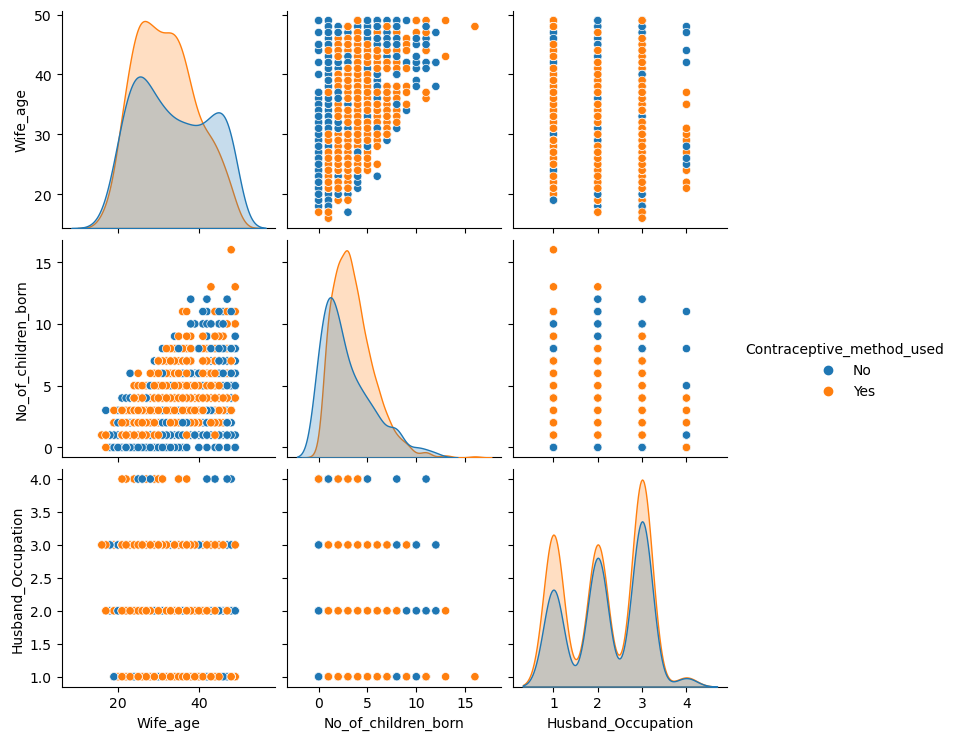

In [17]:
sns.pairplot(data=df,hue='Contraceptive_method_used')

In [5]:
df1=df.drop(columns=["Wife_ education","Husband_education","Wife_religion","Wife_Working","Standard_of_living_index","Media_exposure ","Contraceptive_method_used"],axis=1)
df1.head()

Wife_age  No_of_children_born  Husband_Occupation
0      24.0                  3.0                   2
1      45.0                 10.0                   3
2      43.0                  7.0                   3
3      42.0                  9.0                   3
4      36.0                  8.0                   3

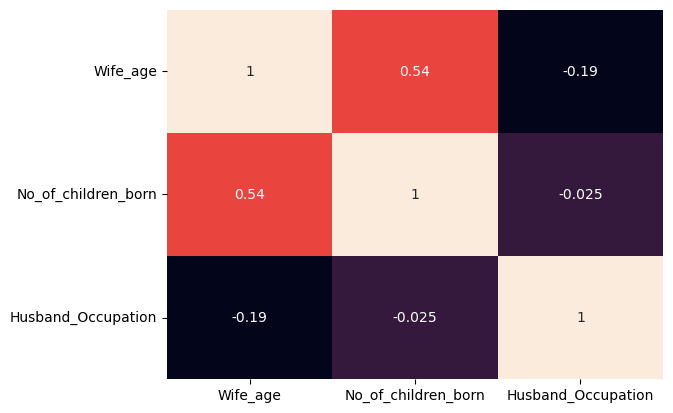

In [23]:
# check corelation among variables
sns.heatmap(df1.corr(), annot = True, cbar=False)
plt.show()

### Problem 2 - Data Pre-processing

In [24]:
# checking for null values
df.isnull().sum()

Wife_age                     67
Wife_ education               0
Husband_education             0
No_of_children_born          21
Wife_religion                 0
Wife_Working                  0
Husband_Occupation            0
Standard_of_living_index      0
Media_exposure                0
Contraceptive_method_used     0
dtype: int64

In [4]:
for column in df.columns:
    if df[column].dtype != 'object':
        mean = df[column].mean()
        df[column] = df[column].fillna(mean)    
        
df.isnull().sum()  

Wife_age                     0
Wife_ education              0
Husband_education            0
No_of_children_born          0
Wife_religion                0
Wife_Working                 0
Husband_Occupation           0
Standard_of_living_index     0
Media_exposure               0
Contraceptive_method_used    0
dtype: int64

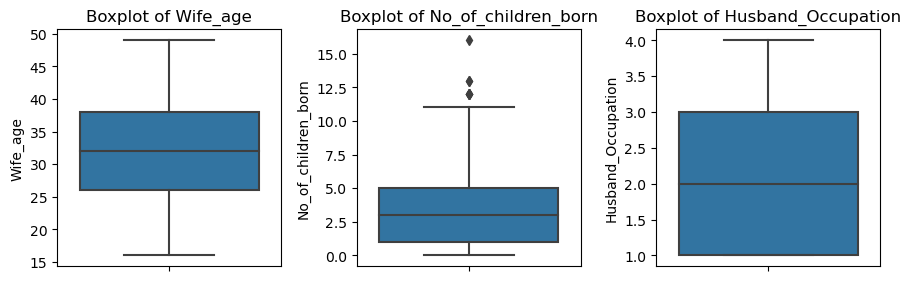

In [6]:
#Check for presence of outliers in each feature
plt.figure(figsize = (12,8))
feature_list = df1.columns
for i in range(len(feature_list)):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(y = df1[feature_list[i]], data = df1)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

In [7]:
#Define a function which returns the Upper and Lower limit to detect outliers for each feature
def remove_outlier(col):
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range 

In [8]:
#Cap & floor the values beyond the outlier boundaries
for i in feature_list:
    LL, UL = remove_outlier(df1[i])
    df1[i] = np.where(df1[i] > UL, UL, df1[i])
    df1[i] = np.where(df1[i] < LL, LL, df1[i])

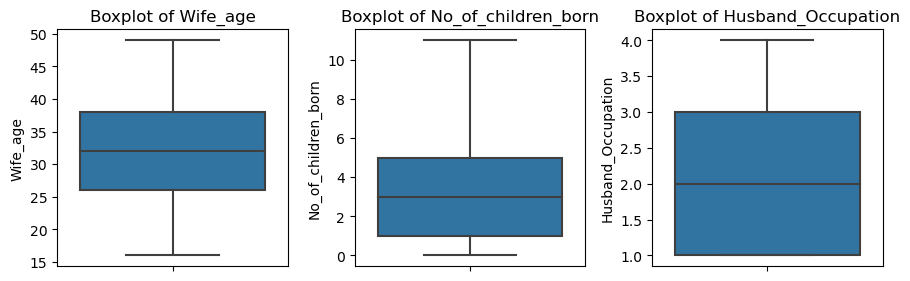

In [9]:
plt.figure(figsize = (12,8))
feature_list = df1.columns
for i in range(len(feature_list)):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(y = df1[feature_list[i]], data = df1)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

#### Encoding

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1393 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Wife_age                   1393 non-null   float64
 1   Wife_ education            1393 non-null   object 
 2   Husband_education          1393 non-null   object 
 3   No_of_children_born        1393 non-null   float64
 4   Wife_religion              1393 non-null   object 
 5   Wife_Working               1393 non-null   object 
 6   Husband_Occupation         1393 non-null   int64  
 7   Standard_of_living_index   1393 non-null   object 
 8   Media_exposure             1393 non-null   object 
 9   Contraceptive_method_used  1393 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 119.7+ KB


In [10]:
for feature in df.columns: 
    if df[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(df[feature].unique()))
        print(pd.Categorical(df[feature].unique()).codes)
        df[feature] = pd.Categorical(df[feature]).codes



feature: Wife_ education
['Primary', 'Uneducated', 'Secondary', 'Tertiary']
Categories (4, object): ['Primary', 'Secondary', 'Tertiary', 'Uneducated']
[0 3 1 2]


feature: Husband_education
['Secondary', 'Primary', 'Tertiary', 'Uneducated']
Categories (4, object): ['Primary', 'Secondary', 'Tertiary', 'Uneducated']
[1 0 2 3]


feature: Wife_religion
['Scientology', 'Non-Scientology']
Categories (2, object): ['Non-Scientology', 'Scientology']
[1 0]


feature: Wife_Working
['No', 'Yes']
Categories (2, object): ['No', 'Yes']
[0 1]


feature: Standard_of_living_index
['High', 'Very High', 'Low', 'Very Low']
Categories (4, object): ['High', 'Low', 'Very High', 'Very Low']
[0 2 1 3]


feature: Media_exposure 
['Exposed', 'Not-Exposed']
Categories (2, object): ['Exposed', 'Not-Exposed']
[0 1]


feature: Contraceptive_method_used
['No', 'Yes']
Categories (2, object): ['No', 'Yes']
[0 1]


In [11]:
print('Wife_ education \n', df['Wife_ education'].value_counts())
print('\n')
print('Husband_education \n', df['Husband_education'].value_counts())
print('\n')
print('Wife_religion \n', df['Wife_religion'].value_counts())
print('\n')
print('Wife_Working \n', df['Wife_Working'].value_counts())
print('\n')
print('Standard_of_living_index \n', df['Standard_of_living_index'].value_counts())
print('\n')
print('Media_exposure \n', df['Media_exposure '].value_counts())
print('\n')
print('Contraceptive_method_used \n', df['Contraceptive_method_used'].value_counts())

Wife_ education 
 Wife_ education
2    515
1    398
0    330
3    150
Name: count, dtype: int64


Husband_education 
 Husband_education
2    827
1    347
0    175
3     44
Name: count, dtype: int64


Wife_religion 
 Wife_religion
1    1186
0     207
Name: count, dtype: int64


Wife_Working 
 Wife_Working
0    1043
1     350
Name: count, dtype: int64


Standard_of_living_index 
 Standard_of_living_index
2    618
0    419
1    227
3    129
Name: count, dtype: int64


Media_exposure 
 Media_exposure 
0    1284
1     109
Name: count, dtype: int64


Contraceptive_method_used 
 Contraceptive_method_used
1    779
0    614
Name: count, dtype: int64


In [35]:
df.describe(include='all').round(2).T

count   mean   std   min   25%   50%   75%   max
Wife_age                   1393.0  32.56  8.09  16.0  26.0  32.0  38.0  49.0
Wife_ education            1393.0   1.35  0.96   0.0   1.0   1.0   2.0   3.0
Husband_education          1393.0   1.53  0.75   0.0   1.0   2.0   2.0   3.0
No_of_children_born        1393.0   3.29  2.38   0.0   1.0   3.0   5.0  16.0
Wife_religion              1393.0   0.85  0.36   0.0   1.0   1.0   1.0   1.0
Wife_Working               1393.0   0.25  0.43   0.0   0.0   0.0   1.0   1.0
Husband_Occupation         1393.0   2.17  0.85   1.0   1.0   2.0   3.0   4.0
Standard_of_living_index   1393.0   1.33  1.00   0.0   0.0   2.0   2.0   3.0
Media_exposure             1393.0   0.08  0.27   0.0   0.0   0.0   0.0   1.0
Contraceptive_method_used  1393.0   0.56  0.50   0.0   0.0   1.0   1.0   1.0

#### Train - Test Split

In [12]:
# Copy all the predictor variables into X dataframe
X = df.drop('Contraceptive_method_used', axis=1)

# Copy target into the y dataframe. 
y = df[['Contraceptive_method_used']]

In [38]:
X.head()

Wife_age  Wife_ education  Husband_education  No_of_children_born  \
0      24.0                0                  1                  3.0   
1      45.0                3                  1                 10.0   
2      43.0                0                  1                  7.0   
3      42.0                1                  0                  9.0   
4      36.0                1                  1                  8.0   

   Wife_religion  Wife_Working  Husband_Occupation  Standard_of_living_index  \
0              1             0                   2                         0   
1              1             0                   3                         2   
2              1             0                   3                         2   
3              1             0                   3                         0   
4              1             0                   3                         1   

   Media_exposure   
0                0  
1                0  
2                0  
3                0  
4                0

In [13]:
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=42)

In [40]:
X_train.shape

(975, 9)

In [41]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 975 entries, 1265 to 1176
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Wife_age                  975 non-null    float64
 1   Wife_ education           975 non-null    int8   
 2   Husband_education         975 non-null    int8   
 3   No_of_children_born       975 non-null    float64
 4   Wife_religion             975 non-null    int8   
 5   Wife_Working              975 non-null    int8   
 6   Husband_Occupation        975 non-null    int64  
 7   Standard_of_living_index  975 non-null    int8   
 8   Media_exposure            975 non-null    int8   
dtypes: float64(2), int64(1), int8(6)
memory usage: 36.2 KB


In [42]:
X_train.head()

Wife_age  Wife_ education  Husband_education  No_of_children_born  \
1265      35.0                0                  2                  4.0   
850       33.0                0                  0                  2.0   
791       31.0                1                  2                  5.0   
294       29.0                2                  2                  1.0   
289       35.0                3                  1                  0.0   

      Wife_religion  Wife_Working  Husband_Occupation  \
1265              0             0                   3   
850               1             0                   3   
791               1             0                   3   
294               1             0                   1   
289               1             0                   2   

      Standard_of_living_index  Media_exposure   
1265                         1                0  
850                          2                0  
791                          3                0  
294                          0                0  
289                          1                1

In [43]:
X_test.shape

(418, 9)

In [44]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 327 to 848
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Wife_age                  418 non-null    float64
 1   Wife_ education           418 non-null    int8   
 2   Husband_education         418 non-null    int8   
 3   No_of_children_born       418 non-null    float64
 4   Wife_religion             418 non-null    int8   
 5   Wife_Working              418 non-null    int8   
 6   Husband_Occupation        418 non-null    int64  
 7   Standard_of_living_index  418 non-null    int8   
 8   Media_exposure            418 non-null    int8   
dtypes: float64(2), int64(1), int8(6)
memory usage: 15.5 KB


In [45]:
X_test.head()

Wife_age  Wife_ education  Husband_education  No_of_children_born  \
327       35.0                2                  2                  2.0   
1154      25.0                1                  0                  1.0   
1023      23.0                2                  2                  1.0   
536       28.0                2                  2                  2.0   
652       30.0                0                  0                  4.0   

      Wife_religion  Wife_Working  Husband_Occupation  \
327               0             0                   3   
1154              1             1                   3   
1023              1             1                   3   
536               1             1                   1   
652               1             0                   2   

      Standard_of_living_index  Media_exposure   
327                          2                0  
1154                         0                0  
1023                         0                0  
536                          0                0  
652                          2                0

### Problem 2 - Model Building and Compare the Performance of the Models

In [14]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [96]:
# Fit the Logistic Regression model
model = LogisticRegression(solver='newton-cg',max_iter=2000,penalty='l2',verbose=True,n_jobs=2)
model.fit(X_train, y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.7s finished


LogisticRegression(max_iter=2000, n_jobs=2, solver='newton-cg', verbose=True)

In [97]:
# Predicting on Train & test dataset
ytrain_predict = model.predict(X_train)
ytest_predict = model.predict(X_test)

In [98]:
ytest_predict_prob=model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

0         1
0  0.357872  0.642128
1  0.534622  0.465378
2  0.363687  0.636313
3  0.376294  0.623706
4  0.465338  0.534662

#### AUC and ROC for the training data

In [99]:
# Accuracy - Training Data
model.score(X_train, y_train)

0.6564102564102564

AUC: 0.665


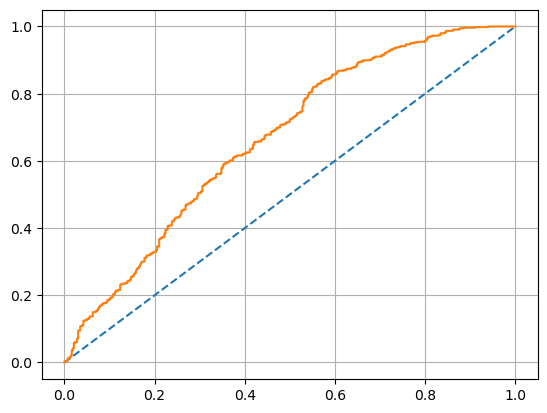

In [100]:
# predict probabilities
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);
plt.grid()

#### AUC and ROC for the test data

In [101]:
# Accuracy - Test Data
model.score(X_test, y_test)

0.631578947368421

AUC: 0.665


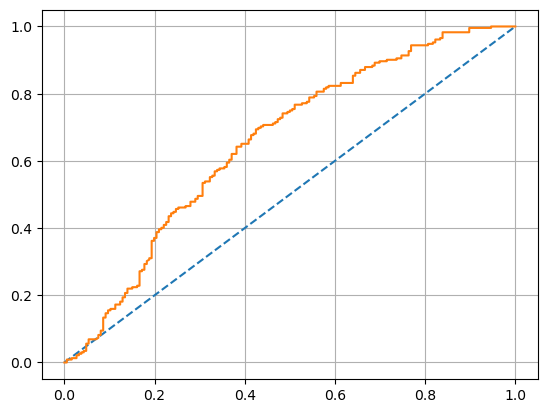

In [102]:
# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);
plt.grid()

#### Confusion Matrix for the training data

In [103]:
confusion_matrix(y_train, ytrain_predict)

array([[191, 237],
       [ 98, 449]], dtype=int64)

In [61]:
from sklearn.metrics import ConfusionMatrixDisplay

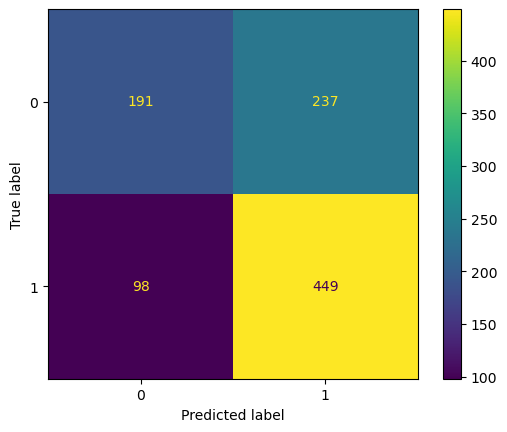

In [105]:
ConfusionMatrixDisplay.from_estimator(model,X_train,y_train)

In [106]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.66      0.45      0.53       428
           1       0.65      0.82      0.73       547

    accuracy                           0.66       975
   macro avg       0.66      0.63      0.63       975
weighted avg       0.66      0.66      0.64       975



#### Inference from Train data
 - 449 is True Positive; this denotes cases where the actual calss of the data point and the predicted is same; Contraceptive method used No is predicted as No
 - 237 is True Negative; this denotes cases where the actual calss of the data point and the predicted is same; Contraceptive method used Yes is predicted as Yes
 - 191 is False Positive; this denotes cases where actual class was negative (0) but predicted as positive (1)
 - 98 is False Negative; this denotes cases where actual class was positive (1) but predicted as negative (0) 

#### Confusion Matrix for test data

In [107]:
confusion_matrix(y_test, ytest_predict)

array([[ 71, 115],
       [ 39, 193]], dtype=int64)

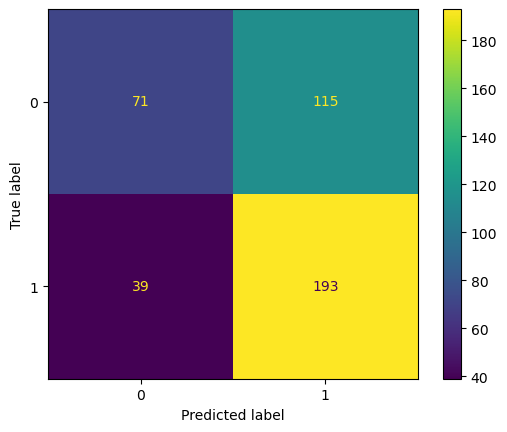

In [108]:
ConfusionMatrixDisplay.from_estimator(model,X_test,y_test);

In [109]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.65      0.38      0.48       186
           1       0.63      0.83      0.71       232

    accuracy                           0.63       418
   macro avg       0.64      0.61      0.60       418
weighted avg       0.64      0.63      0.61       418



#### Inference from Test data
 - 193 is True Positive; this denotes cases where the actual calss of the data point and the predicted is same; Contraceptive method used No is predicted as No
 - 115 is True Negative; this denotes cases where the actual calss of the data point and the predicted is same; Contraceptive method used Yes is predicted as Yes
 - 71 is False Positive; this denotes cases where actual class was negative (0) but predicted as positive (1) 
 - 39 is False Negative; this denotes cases where actual class was positive (1) but predicted as negative (0)

### LDA Model

In [15]:
#Build LDA Model
clf = LinearDiscriminantAnalysis()
model=clf.fit(X_train,y_train)

In [16]:
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = model.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = model.predict(X_test)

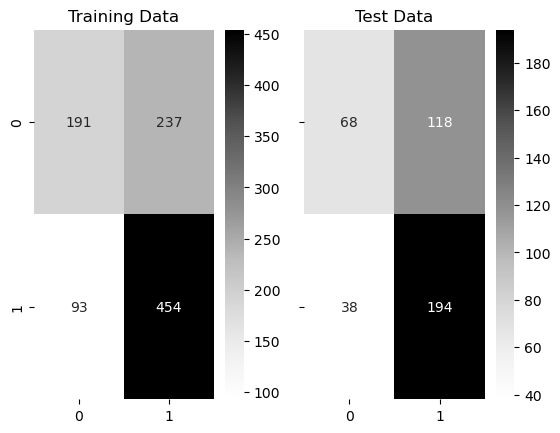

In [86]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,pred_class_train)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,pred_class_test)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');

In [18]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,pred_class_train),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,pred_class_test),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.67      0.45      0.54       428
           1       0.66      0.83      0.73       547

    accuracy                           0.66       975
   macro avg       0.66      0.64      0.63       975
weighted avg       0.66      0.66      0.65       975
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.64      0.37      0.47       186
           1       0.62      0.84      0.71       232

    accuracy                           0.63       418
   macro avg       0.63      0.60      0.59       418
weighted avg       0.63      0.63      0.60       418
 



In [19]:
# Training Data Probability Prediction
pred_prob_train = model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = model.predict_proba(X_test)

In [115]:
pred_prob_train[:,1]

array([0.68274578, 0.35097695, 0.68778055, 0.58008303, 0.15883118,
       0.70420131, 0.44036613, 0.65600623, 0.65662715, 0.55244559,
       0.63084663, 0.31851611, 0.68249103, 0.4847371 , 0.27501087,
       0.67303943, 0.7300706 , 0.69757265, 0.69786784, 0.61612913,
       0.52283762, 0.48924646, 0.68745278, 0.60760582, 0.54672856,
       0.67340062, 0.7701886 , 0.59668893, 0.53031406, 0.6370861 ,
       0.52001712, 0.65570431, 0.7600449 , 0.56040219, 0.64551092,
       0.64434312, 0.67921952, 0.74803658, 0.39435331, 0.38437408,
       0.53298409, 0.32148618, 0.69709444, 0.60779801, 0.26197032,
       0.66502858, 0.26450295, 0.40642722, 0.64946306, 0.68383208,
       0.60182765, 0.54942135, 0.52353227, 0.58846083, 0.72594203,
       0.32106094, 0.61107271, 0.62789467, 0.69867707, 0.72762104,
       0.14765968, 0.61207002, 0.37244517, 0.67776816, 0.22978334,
       0.43756824, 0.60461503, 0.70829191, 0.56247793, 0.73960706,
       0.45980827, 0.10094816, 0.51071392, 0.50841544, 0.34100

AUC for the Training Data: 0.665
AUC for the Test Data: 0.653


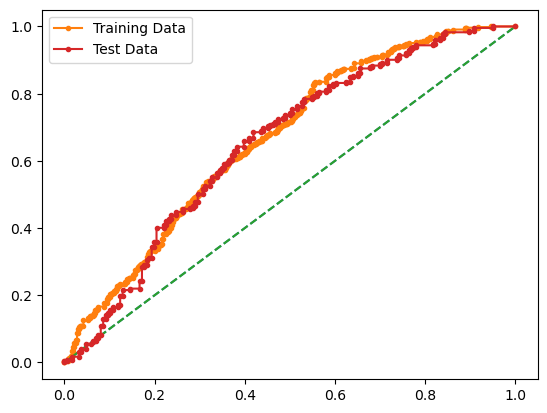

In [116]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [20]:
model.coef_

array([[-0.07877181,  0.1877636 ,  0.17717398,  0.24319775, -0.67322971,
        -0.11475657, -0.04331134, -0.02473728, -1.21677711]])

In [21]:
model.intercept_

array([2.350965])

In [23]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 975 entries, 1265 to 1176
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Wife_age                  975 non-null    float64
 1   Wife_ education           975 non-null    int8   
 2   Husband_education         975 non-null    int8   
 3   No_of_children_born       975 non-null    float64
 4   Wife_religion             975 non-null    int8   
 5   Wife_Working              975 non-null    int8   
 6   Husband_Occupation        975 non-null    int64  
 7   Standard_of_living_index  975 non-null    int8   
 8   Media_exposure            975 non-null    int8   
dtypes: float64(2), int64(1), int8(6)
memory usage: 36.2 KB


#### LDA = 2.35 + (-0.0787 * Wife_age) + (0.187 * Wife_ education) + (0.177 * Husband_education) + (0.243 * No_of_children_born) + (-0.673 * Wife_religion) + (-0.114 * Wife_Working) + (-0.043 * Husband_Occupation) + (-0.024 * Standard_of_living_index) + (-1.216 * Media_exposure)

### CART Model

In [41]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)
print('Total Obs',975+418)

X_train (975, 9)
X_test (418, 9)
y_train (975, 1)
y_test (418, 1)
Total Obs 1393


In [27]:
# Initialise a Decision Tree Classifier
dt_model = DecisionTreeClassifier(criterion = 'gini', random_state=1)

In [28]:
# Fit the model
dt_model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=1)

In [29]:
from sklearn import tree

train_char_label = ['No', 'Yes']
ld_Tree_File = open('ld_Tree_File.dot','w')
dot_data = tree.export_graphviz(dt_model, 
                                out_file=ld_Tree_File, 
                                feature_names = list(X_train), 
                                class_names = list(train_char_label))

ld_Tree_File.close()

In [30]:
print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))


                               Imp
Wife_age                  0.315535
No_of_children_born       0.235611
Standard_of_living_index  0.098524
Wife_ education           0.096437
Husband_Occupation        0.095888
Husband_education         0.069908
Wife_Working              0.038037
Wife_religion             0.030362
Media_exposure            0.019698


In [31]:
y_predict = dt_model.predict(X_test)
y_predict.shape

(418,)

In [32]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : [1,5,10,15,20],
              'min_samples_leaf':[1,5,10,15,20],
              'criterion' :['gini', 'entropy']
             }
tree_clas = DecisionTreeClassifier(random_state=1024)
grid_search = GridSearchCV(estimator=tree_clas, param_grid=param_grid, cv=5, verbose=True)
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 450 candidates, totalling 2250 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1024),
             param_grid={'ccp_alpha': [0.1, 0.01, 0.001],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 5, 10, 15, 20],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 5, 10, 15, 20]},
             verbose=True)

In [33]:
grid_search.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.001, criterion='entropy', max_depth=10,
                       max_features='sqrt', min_samples_leaf=5,
                       random_state=1024)

In [34]:
reg_dt_model = DecisionTreeClassifier( ccp_alpha=0.001,criterion='entropy', max_depth=15,random_state=1024)
reg_dt_model.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.001, criterion='entropy', max_depth=15,
                       random_state=1024)

In [35]:
ld_tree_regularized = open('ld_tree_regularized.dot','w')
dot_data = tree.export_graphviz(reg_dt_model, out_file= ld_tree_regularized , feature_names = list(X_train), class_names = list(train_char_label))

ld_tree_regularized.close()
dot_data

In [36]:
print (pd.DataFrame(reg_dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                               Imp
Wife_age                  0.299220
No_of_children_born       0.255744
Wife_ education           0.100791
Husband_education         0.084069
Husband_Occupation        0.077820
Standard_of_living_index  0.074705
Wife_religion             0.041152
Wife_Working              0.040260
Media_exposure            0.026238


In [37]:
ytrain_predict = reg_dt_model.predict(X_train)
ytest_predict = reg_dt_model.predict(X_test)
print('ytrain_predict',ytrain_predict.shape)
print('ytest_predict',ytest_predict.shape)

ytrain_predict (975,)
ytest_predict (418,)


In [38]:
ytest_predict

array([1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,

In [43]:
ytrain_predict_prob=reg_dt_model.predict_proba(X_train)
ytrain_predict_prob

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [1., 0.]])

In [39]:
ytest_predict_prob=reg_dt_model.predict_proba(X_test)
ytest_predict_prob

array([[0.        , 1.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.

In [155]:
 pd.DataFrame(ytest_predict_prob)

0         1
0    0.000000  1.000000
1    1.000000  0.000000
2    0.000000  1.000000
3    0.000000  1.000000
4    0.000000  1.000000
..        ...       ...
413  0.000000  1.000000
414  0.333333  0.666667
415  0.000000  1.000000
416  1.000000  0.000000
417  1.000000  0.000000

[418 rows x 2 columns]

In [44]:
 pd.DataFrame(ytrain_predict_prob)

0    1
0    0.0  1.0
1    0.0  1.0
2    0.0  1.0
3    1.0  0.0
4    1.0  0.0
..   ...  ...
970  1.0  0.0
971  1.0  0.0
972  0.0  1.0
973  0.0  1.0
974  1.0  0.0

[975 rows x 2 columns]

In [63]:
dtc = DecisionTreeClassifier()
lda= LinearDiscriminantAnalysis()
lor= LogisticRegression()


models=[dtc,lda,lor]

accuracy_train=[]
accuracy_test=[]


for i in models:  # Computation of RMSE and R2 values 
    i.fit(X_train,y_train)
    accuracy_train.append(accuracy_score(y_train,i.predict(X_train)))
    accuracy_test.append(accuracy_score(y_test,i.predict(X_test)))
        
print(pd.DataFrame({'Train Accuracy': accuracy_train,'Test Accuracy': accuracy_test},
            index=['Decision Tree Classifier','LDA','Logistic Regression']))

                          Train Accuracy  Test Accuracy
Decision Tree Classifier        0.984615       0.610048
LDA                             0.661538       0.626794
Logistic Regression             0.657436       0.631579


**Looks like Decision Tree Classifier, is under-fitting because train accuracy > test accuracy ., Let's Grid Search to get the best parameters  or prune the tree**

#### Grid Search CV:

In [158]:
param_grid = {
    'max_depth': [10,15,20,25,30],
    'min_samples_leaf': [3, 15,30],
    'min_samples_split': [15,30,35,40,50],
    'criterion' :['gini', 'entropy']
}

dtr=tree.DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtr, param_grid = param_grid, cv = 3)


grid_search.fit(X_train,y_train)

print(grid_search.best_params_)

{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 50}


In [159]:
dtc = DecisionTreeClassifier(criterion='gini', max_depth=20, min_samples_leaf=3, min_samples_split=30)
#Using best parameters in above 
lda= LinearDiscriminantAnalysis()
lor= LogisticRegression()


models=[dtc,lda,lor]

accuracy_train=[]
accuracy_test=[]


for i in models:  # Computation of RMSE and R2 values 
    i.fit(X_train,y_train)
    accuracy_train.append(accuracy_score(y_train,i.predict(X_train)))
    accuracy_test.append(accuracy_score(y_test,i.predict(X_test)))
        
print(pd.DataFrame({'Train Accuracy': accuracy_train,'Test Accuracy': accuracy_test},
            index=['Decision Tree Classifier','LDA','Logistic Regression']))

                          Train Accuracy  Test Accuracy
Decision Tree Classifier        0.772308       0.667464
LDA                             0.661538       0.626794
Logistic Regression             0.657436       0.631579


AUC: 0.859


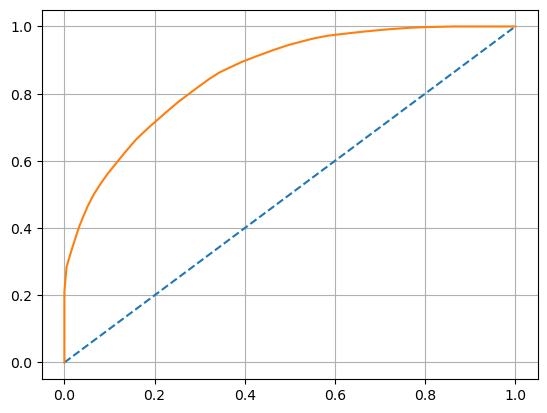

In [160]:
# predict probabilities
probs = dtc.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);
plt.grid()

AUC: 0.859


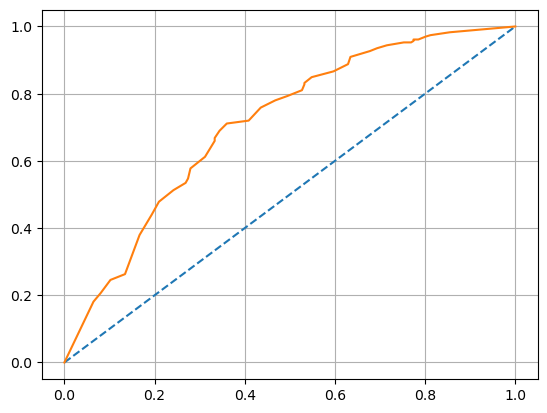

In [161]:
# predict probabilities
probs = dtc.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);
plt.grid()

###  Classification report 

In [162]:
print(classification_report(y_train, dtc.predict(X_train)))#Trainig Classification report 

              precision    recall  f1-score   support

           0       0.79      0.66      0.72       428
           1       0.76      0.86      0.81       547

    accuracy                           0.77       975
   macro avg       0.78      0.76      0.76       975
weighted avg       0.77      0.77      0.77       975



In [163]:
print(classification_report(y_test, dtc.predict(X_test)))#Trainig Classification report 

              precision    recall  f1-score   support

           0       0.69      0.47      0.56       186
           1       0.66      0.83      0.73       232

    accuracy                           0.67       418
   macro avg       0.67      0.65      0.65       418
weighted avg       0.67      0.67      0.65       418



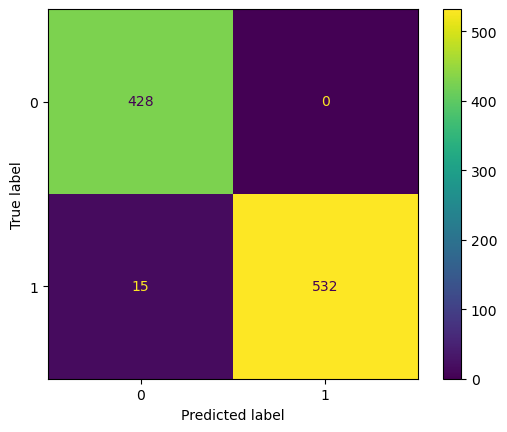

In [96]:
ConfusionMatrixDisplay.from_estimator(dt_model,X_train,y_train);

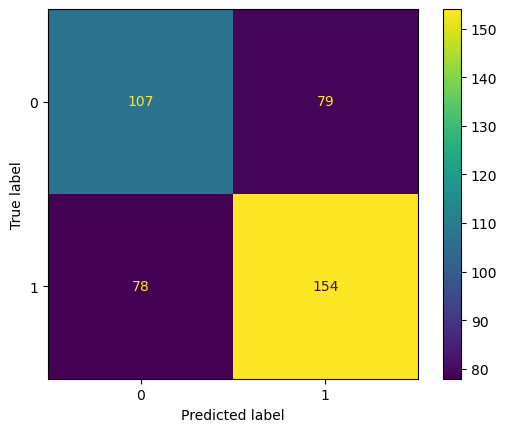

In [97]:
ConfusionMatrixDisplay.from_estimator(dt_model,X_test,y_test);

**By comapring above 3 models with the important component like AUC, Accuracy, precision, recall,f1-score. Logistic regression performed well on predicting the dependent variable, but when it is compared with LDA and CART model it shows lesser performance in both train and test data. LDA performed well than Logistic Regression, in precision 0 both Logistic and LDA model outcome are same. Accuracy of LDA is much better than Logistic Regression.**